In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kde

import matplotlib 
matplotlib.rc('xtick', labelsize=23) 
matplotlib.rc('ytick', labelsize=23) 
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rc('text', usetex=True)

# Step 1: Download the data from Exoplanet Archive
url = 'https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+*+from+pscomppars&format=csv'
data = pd.read_csv(url)



In [2]:
for col in data.columns:
    print(col)

objectid
pl_name
pl_letter
hostid
hostname
hd_name
hip_name
tic_id
disc_pubdate
disc_year
disc_method
discoverymethod
disc_locale
disc_facility
disc_instrument
disc_telescope
disc_refname
ra
raerr1
raerr2
rasymerr
rastr
ra_solnid
ra_reflink
dec
decerr1
decerr2
decsymerr
decstr
dec_solnid
dec_reflink
glon
glonerr1
glonerr2
glonsymerr
glonstr
glon_solnid
glon_reflink
glat
glaterr1
glaterr2
glatsymerr
glatstr
glat_solnid
glat_reflink
elon
elonerr1
elonerr2
elonsymerr
elonstr
elon_solnid
elon_reflink
elat
elaterr1
elaterr2
elatsymerr
elat_solnid
elat_reflink
elatstr
pl_orbper
pl_orbpererr1
pl_orbpererr2
pl_orbpersymerr
pl_orbperlim
pl_orbperstr
pl_orbperformat
pl_orbper_solnid
pl_orbper_reflink
pl_orblpererr1
pl_orblper
pl_orblpererr2
pl_orblpersymerr
pl_orblperlim
pl_orblperstr
pl_orblperformat
pl_orblper_solnid
pl_orblper_reflink
pl_orbsmax
pl_orbsmaxerr1
pl_orbsmaxerr2
pl_orbsmaxsymerr
pl_orbsmaxlim
pl_orbsmaxstr
pl_orbsmaxformat
pl_orbsmax_solnid
pl_orbsmax_reflink
pl_orbincl
pl_orbinc

In [3]:
from matplotlib.lines import Line2D
def plot_contour(data, label, color, legend_handles):
    if len(data) < 2:
        print(f"Not enough data points for {label}. Skipping contour.")
        return
    
    # Use kde to estimate density
    x = np.log10(data['semi_major_axis'])
    y = np.log10(data['Planet_Mass'])
    k = kde.gaussian_kde([x, y])
    
    # Create grid
    xi, yi = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    
    # Plot contour
    plt.contour(10**xi, 10**yi, zi.reshape(xi.shape), colors=color, levels=3, linewidths=3)
    
    # Create a custom legend line
    legend_line = Line2D([0], [0], color=color, lw=3, label=label)
    
    # Add custom legend line to the list of handles
    legend_handles.append(legend_line)
    
    

Number of data points for Transit: 4191
Number of data points for Radial Velocity: 1110
Number of data points for TTV: 33


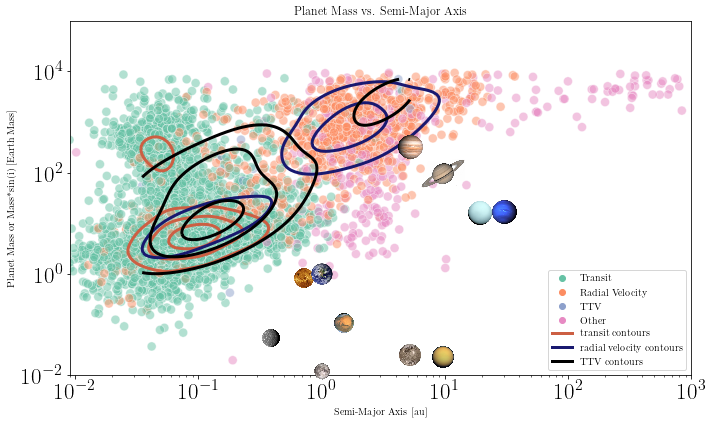

In [4]:
# Step 2: Filter relevant columns (semi-major axis, Mass, Detection Method)
df = data[['pl_orbsmax', 'pl_bmasse', 'disc_method']].dropna()

# Rename columns for clarity
df.rename(columns={'pl_orbsmax': 'semi_major_axis', 'pl_bmasse': 'Planet_Mass', 'disc_method': 'Detection_Method'}, inplace=True)

# Step 3: Combine all non-'tran', non-'rv', non-'ttv' methods into 'Other'
df['Detection_Method'] = df['Detection_Method'].replace({'tran': 'Transit', 'rv': 'Radial Velocity', 'ttv': 'TTV'})
df['Detection_Method'] = df['Detection_Method'].where(df['Detection_Method'].isin(['Transit', 'Radial Velocity', 'TTV']), 'Other')

# Filter the DataFrame to include only relevant detection methods
df = df[df['Detection_Method'].isin(['Transit', 'Radial Velocity', 'TTV', 'Other'])]

# Step 4: Plot mass (or mass*sin(i)) vs. semi-major axis  diagram, color by detection method
fig, ax = plt.subplots(figsize=(10, 6))

# Create a scatter plot and capture the legend handles
scatter = sns.scatterplot(data=df, x='semi_major_axis', y='Planet_Mass', hue='Detection_Method', palette='Set2', s=81, alpha=0.5)

# Get the current legend handles from the scatter plot
scatter_legend_handles = scatter.get_legend_handles_labels()

# Set log scale
plt.xscale('log')
plt.yscale('log')

# Labels and title
plt.xlabel('Semi-Major Axis [au]')
plt.ylabel('Planet Mass or Mass*sin(i) [Earth Mass]')
plt.title('Planet Mass vs. Semi-Major Axis')



#Add the Solar System planet images
#Uses the solution by Joe Kington from https://stackoverflow.com/questions/22566284/matplotlib-how-to-plot-images-instead-of-points
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

planetsize=0.1
imscatter([0.387098],[0.055], 'mercury.png',ax=ax,zoom=planetsize*0.3)
imscatter([0.723332],[0.815], 'venus.png',ax=ax,zoom=planetsize*0.9)
imscatter([1],[1],'Earth_Western_Hemisphere_transparent_background.png',ax=ax,zoom=planetsize)
imscatter([1.523679],[0.107], 'mars.png',ax=ax,zoom=planetsize*240/500.0*0.9)
imscatter([5.204267],[317.8],'jupiter.png',ax=ax,zoom=planetsize)
imscatter([9.582017],[95.152],'saturn.png',ax=ax,zoom=planetsize*1.35)
imscatter([19.229411],[15.91],'uranus.png',ax=ax,zoom=planetsize)
imscatter([30.103662],[17.147],'neptune.png',ax=ax,zoom=planetsize)
imscatter([1],[0.7349/59.736],'moon.png',ax=ax,zoom=planetsize*0.5)
imscatter([5.204267],[1.4819/59.736],'ganymede.png',ax=ax,zoom=planetsize)
imscatter([9.582017],[1.346/59.736],'titan.png',ax=ax,zoom=planetsize*0.22)

    
    
    
# Step 5: Add contour for transit and radial velocity detection methods
# Filter data for 'Transit' and 'Radial Velocity' methods
transit_data = df[df['Detection_Method'] == 'Transit']
rv_data = df[df['Detection_Method'] == 'Radial Velocity']
ttv_data = df[df['Detection_Method'] == 'TTV']

# Plot contours for Transit and Radial Velocity
print(f"Number of data points for Transit: {len(transit_data)}")
print(f"Number of data points for Radial Velocity: {len(rv_data)}")
print(f"Number of data points for TTV: {len(ttv_data)}")

# Initialize legend handles for contours
legend_handles = []


# Call the contour plotting function for both Transit and Radial Velocity
plot_contour(transit_data, 'transit contours', '#cc5f43', legend_handles)
plot_contour(rv_data, 'radial velocity contours', '#191970', legend_handles)
plot_contour(ttv_data, 'TTV contours', 'k', legend_handles)

# Combine the original scatter handles with the custom contour handles
all_legend_handles = scatter_legend_handles[0] + legend_handles

#Axis limits
Mmin=0.01
Mmax=1e5 #15000
amin=0.009
amax=1e3
ax.set_xlim([amin,amax])
ax.set_ylim([Mmin,Mmax])

# Add legend and show plot
plt.legend(handles=all_legend_handles)
plt.tight_layout()
plt.show()


5686
5686
Number of data points for Transit: 4431
Number of data points for Radial Velocity: 1145
Number of data points for Other: 110


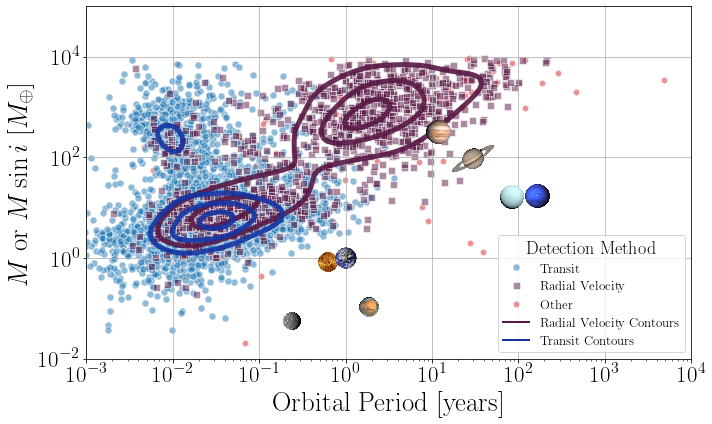

In [5]:
from matplotlib.lines import Line2D
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as kde  # Make sure to import kde if not done yet

def plot_contour(data, label, color):
    if len(data) < 2:
        print(f"Not enough data points for {label}. Skipping contour.")
        return
    
    # Use kde to estimate density
    x = np.log10(data['Orbital_Period'] / 365.25)
    y = np.log10(data['Planet_Mass'])
    k = kde.gaussian_kde([x, y])
    
    # Create grid
    xi, yi = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    
    # Plot contour
    plt.contour(10**xi, 10**yi, zi.reshape(xi.shape), colors=color, levels=3, linewidths=5, alpha=0.9)

# Step 2: Filter relevant columns (semi-major axis, Mass, Detection Method)
df = data[['pl_orbper', 'pl_bmasse', 'disc_method']].dropna()

# Rename columns for clarity
df.rename(columns={'pl_orbper': 'Orbital_Period', 'pl_bmasse': 'Planet_Mass', 'disc_method': 'Detection_Method'}, inplace=True)

# Step 3: Combine all non-'tran', non-'rv', non-'ttv' methods into 'Other'
df['Detection_Method'] = df['Detection_Method'].replace({'tran': 'Transit', 'rv': 'Radial Velocity'})
df['Detection_Method'] = df['Detection_Method'].where(df['Detection_Method'].isin(['Transit', 'Radial Velocity']), 'Other')

# Filter the DataFrame to include only relevant detection methods
df = df[df['Detection_Method'].isin(['Transit', 'Radial Velocity', 'Other'])]

# Filter data for 'Transit' and 'Radial Velocity' methods
transit_data = df[df['Detection_Method'] == 'Transit']
rv_data = df[df['Detection_Method'] == 'Radial Velocity']
other_data = df[df['Detection_Method'] == 'Other']

print(len(other_data) + len(rv_data) + len(transit_data))
print(len(df))

# Step 4: Plot mass (or mass*sin(i)) vs. semi-major axis diagram, color by detection method
fig, ax = plt.subplots(figsize=(10, 6))

# Create a scatter plot for Transit
transit_plot = ax.plot(
    transit_data['Orbital_Period'] / 365.25, transit_data['Planet_Mass'],
    color='#1F77B4', ls='', marker='o', ms=7, alpha=0.5, 
    markeredgecolor='white', zorder=-100000, label='Transit'
)

# Create a scatter plot for Radial Velocity
rv_plot = ax.plot(
    rv_data['Orbital_Period'] / 365.25, rv_data['Planet_Mass'],
    color='#581845', ls='', marker='s', ms=7, alpha=0.5, 
    markeredgecolor='white', zorder=-10000, label='Radial Velocity'
)

# Create a scatter plot for Other methods
other_plot = ax.plot(
    other_data['Orbital_Period'] / 365.25, other_data['Planet_Mass'],
    color='#D62728', ls='', marker='h', ms=7, alpha=0.5, 
    markeredgecolor='white', zorder=-1000000, label='Other'
)

# Plot contours for Transit and Radial Velocity
print(f"Number of data points for Transit: {len(transit_data)}")
print(f"Number of data points for Radial Velocity: {len(rv_data)}")
print(f"Number of data points for Other: {len(other_data)}")

# Call the contour plotting function for both Transit and Radial Velocity
plot_contour(rv_data, 'Radial Velocity Contours', '#581845')
plot_contour(transit_data, 'Transit Contours', '#1434A4')

# Create legend handles from contour plots
contour_handles = [
    Line2D([0], [0], color='#581845', lw=2, label='Radial Velocity Contours'),
    Line2D([0], [0], color='#1434A4', lw=2, label='Transit Contours')
]

# Combine the original scatter handles with the custom contour handles
# Use only handles, no labels here to avoid mismatch
scatter_handles, scatter_labels = ax.get_legend_handles_labels()
all_legend_handles = scatter_handles + contour_handles
all_legend_labels = scatter_labels + [handle.get_label() for handle in contour_handles]



#Add the Solar System planet images
#Uses the solution by Joe Kington from https://stackoverflow.com/questions/22566284/matplotlib-how-to-plot-images-instead-of-points
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists


#orbital periods from https://www.princeton.edu/~willman/planetary_systems/Sol/
#masses from perry microlensing roman paper code 
planetsize=0.1
imscatter([0.2408467],[0.055], 'mercury.png',ax=ax,zoom=planetsize*0.3)
imscatter([0.61519726],[0.815], 'venus.png',ax=ax,zoom=planetsize*0.9)
imscatter([1.0000174],[1],'Earth_Western_Hemisphere_transparent_background.png',ax=ax,zoom=planetsize)
imscatter([1.8808158],[0.107], 'mars.png',ax=ax,zoom=planetsize*240/500.0*0.9)
imscatter([11.862615],[317.8],'jupiter.png',ax=ax,zoom=planetsize)
imscatter([29.447498],[95.152],'saturn.png',ax=ax,zoom=planetsize*1.35)
imscatter([84.016846],[15.91],'uranus.png',ax=ax,zoom=planetsize)
imscatter([164.79132],[17.147],'neptune.png',ax=ax,zoom=planetsize)



# Axis limits
Mmin = 1e-2
Mmax = 1e5
Pmin = 1e-3
Pmax = 1e4
ax.set_xlim([Pmin, Pmax])
ax.set_ylim([Mmin, Mmax])

plt.grid(which='major')

# Set log scale
plt.xscale('log')
plt.yscale('log')

# Labels and title
plt.xlabel('Orbital Period [years]', fontsize=27)
plt.ylabel(r'$M$ or $M\sin{i}$ [$M_\oplus$]', fontsize=27)

# Add legend with title
legend = plt.legend(
    all_legend_handles, all_legend_labels, 
    title='Detection Method', loc='lower right', 
    fontsize=13
)
plt.setp(legend.get_title(), fontsize=18)  # Change the legend title font size if needed

plt.tight_layout()
plt.show()


In [6]:
import numpy as np

# Define the constant
gaia_precision = 34.2

# Generate x values from 0 to 90 degrees
x_values = np.linspace(0, 90, 1000)  # 1000 points from 0 to 90 degrees

# Compute the expression
y_values = (5 * gaia_precision * np.sin(np.radians(x_values)) + gaia_precision * np.cos(np.radians(x_values)))

# Calculate the median
gaia_precision_scanning = np.median(y_values)

# Print the median value
print("gaia scanning per obs [uas]: ", gaia_precision_scanning)


# Detection threshold: Change this value to adjust the detection threshold
detection_threshold = gaia_precision_scanning / np.sqrt(68.9)  # µas
print('Gaia DR4 precision [uas]: ', detection_threshold)


#gaia_baseline dr4 = 66 months
gaia_baseline = 66/12
print('Gaia DR4 baseline [years]: ', gaia_baseline)


gaia scanning per obs [uas]:  145.09826665787682
Gaia DR4 precision [uas]:  17.480450198591363
Gaia DR4 baseline [years]:  5.5


5686
5686
Number of data points for Transit: 4431
Number of data points for Radial Velocity: 1145
Number of data points for Other: 110


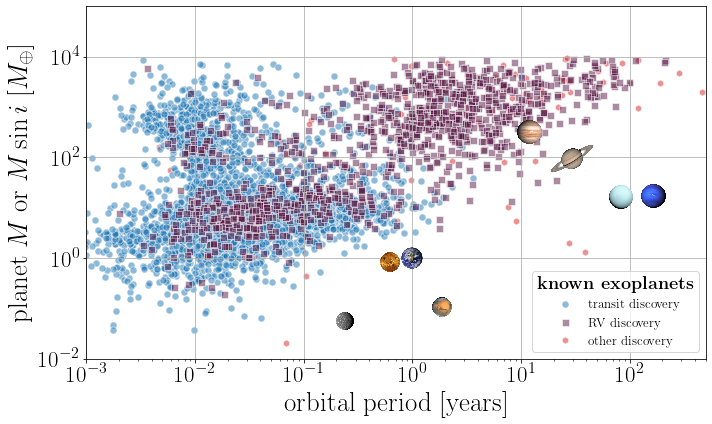

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


from matplotlib.lines import Line2D
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as kde  # Make sure to import kde if not done yet

def plot_contour(data, label, color):
    if len(data) < 2:
        print(f"Not enough data points for {label}. Skipping contour.")
        return
    
    # Use kde to estimate density
    x = np.log10(data['Orbital_Period'] / 365.25)
    y = np.log10(data['Planet_Mass'])
    k = kde.gaussian_kde([x, y])
    
    # Create grid
    xi, yi = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    
    # Plot contour
    plt.contour(10**xi, 10**yi, zi.reshape(xi.shape), colors=color, levels=3, linewidths=5, alpha=0.9)

# Step 2: Filter relevant columns (semi-major axis, Mass, Detection Method)
df = data[['pl_orbper', 'pl_bmasse', 'disc_method']].dropna()

# Rename columns for clarity
df.rename(columns={'pl_orbper': 'Orbital_Period', 'pl_bmasse': 'Planet_Mass', 'disc_method': 'Detection_Method'}, inplace=True)

# Step 3: Combine all non-'tran', non-'rv', non-'ttv' methods into 'Other'
df['Detection_Method'] = df['Detection_Method'].replace({'tran': 'Transit', 'rv': 'Radial Velocity'})
df['Detection_Method'] = df['Detection_Method'].where(df['Detection_Method'].isin(['Transit', 'Radial Velocity']), 'Other')

# Filter the DataFrame to include only relevant detection methods
df = df[df['Detection_Method'].isin(['Transit', 'Radial Velocity', 'Other'])]

# Filter data for 'Transit' and 'Radial Velocity' methods
transit_data = df[df['Detection_Method'] == 'Transit']
rv_data = df[df['Detection_Method'] == 'Radial Velocity']
other_data = df[df['Detection_Method'] == 'Other']

print(len(other_data) + len(rv_data) + len(transit_data))
print(len(df))

# Step 4: Plot mass (or mass*sin(i)) vs. semi-major axis diagram, color by detection method
fig, ax = plt.subplots(figsize=(10, 6))

# Create a scatter plot for Transit
transit_plot = ax.plot(
    transit_data['Orbital_Period'] / 365.25, transit_data['Planet_Mass'],
    color='#1F77B4', ls='', marker='o', ms=7, alpha=0.5, 
    markeredgecolor='white', zorder=-100000, label='transit discovery'
)

# Create a scatter plot for Radial Velocity
rv_plot = ax.plot(
    rv_data['Orbital_Period'] / 365.25, rv_data['Planet_Mass'],
    color='#581845', ls='', marker='s', ms=7, alpha=0.5, 
    markeredgecolor='white', zorder=-10000, label='RV discovery'
)

# Create a scatter plot for Other methods
other_plot = ax.plot(
    other_data['Orbital_Period'] / 365.25, other_data['Planet_Mass'],
    color='#D62728', ls='', marker='h', ms=7, alpha=0.5, 
    markeredgecolor='white', zorder=-1000000, label='other discovery'
)

# Plot contours for Transit and Radial Velocity
print(f"Number of data points for Transit: {len(transit_data)}")
print(f"Number of data points for Radial Velocity: {len(rv_data)}")
print(f"Number of data points for Other: {len(other_data)}")

'''
# Call the contour plotting function for both Transit and Radial Velocity
plot_contour(rv_data, 'Radial Velocity Contours', '#581845')
plot_contour(transit_data, 'Transit Contours', '#1434A4')

# Create legend handles from contour plots
contour_handles = [
    Line2D([0], [0], color='#581845', lw=2, label='Radial Velocity Contours'),
    Line2D([0], [0], color='#1434A4', lw=2, label='Transit Contours')
]
'''

# Combine the original scatter handles with the custom contour handles
# Use only handles, no labels here to avoid mismatch
scatter_handles, scatter_labels = ax.get_legend_handles_labels()
all_legend_handles = scatter_handles #+ contour_handles
all_legend_labels = scatter_labels + [handle.get_label() for handle in contour_handles]



'''
# Define planet masses (in Earth masses) and orbital periods (in years)
planet_masses = np.linspace(10, 10**6, 1000)  # Planet masses from 10 to 1e6 Earth masses
planet_periods = np.linspace(1e-3, gaia_baseline, 10000)  # Planet periods from 1 to 100 years
mass_grid, period_grid = np.meshgrid(planet_masses, planet_periods)


# Define the fixed stellar mass (in solar masses) and distance (in parsecs)
fixed_stellar_mass = [.1, 1]  # 1 Solar Mass
fixed_distance = [50]     # 50 Parsecs

for dist in fixed_distance:
    for stellar_mass in fixed_stellar_mass:
        # Calculate the astrometric signal over the grid
        astrometric_signal_grid = 3 * mass_grid * (stellar_mass ** (-2 / 3)) * (period_grid ** (2 / 3)) * (dist ** (-1))

        if stellar_mass==.1:
            contour = ax.contour(period_grid, mass_grid, astrometric_signal_grid, levels=[detection_threshold], 
                                   linewidths=5, alpha=1, colors='k', zorder=10000, linestyles='solid')
        else:
            contour = ax.contour(period_grid, mass_grid, astrometric_signal_grid, levels=[detection_threshold], 
                                   linewidths=5, alpha=1, colors='k', zorder=10000, linestyles='dotted')

ax.axvline(gaia_baseline, 0.475, 1, color='k', lw=5, ls='solid')
ax.axvline(gaia_baseline, 0.57, 1, color='k', lw=5, ls='dotted')
'''



#Add the Solar System planet images
#Uses the solution by Joe Kington from https://stackoverflow.com/questions/22566284/matplotlib-how-to-plot-images-instead-of-points
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists


#orbital periods from https://www.princeton.edu/~willman/planetary_systems/Sol/
#masses from perry microlensing roman paper code 
planetsize=0.1
imscatter([0.2408467],[0.055], 'mercury.png',ax=ax,zoom=planetsize*0.3)
imscatter([0.61519726],[0.815], 'venus.png',ax=ax,zoom=planetsize*0.9)
imscatter([1.0000174],[1],'Earth_Western_Hemisphere_transparent_background.png',ax=ax,zoom=planetsize)
imscatter([1.8808158],[0.107], 'mars.png',ax=ax,zoom=planetsize*240/500.0*0.9)
imscatter([11.862615],[317.8],'jupiter.png',ax=ax,zoom=planetsize)
imscatter([29.447498],[95.152],'saturn.png',ax=ax,zoom=planetsize*1.35)
imscatter([84.016846],[15.91],'uranus.png',ax=ax,zoom=planetsize)
imscatter([164.79132],[17.147],'neptune.png',ax=ax,zoom=planetsize)






# Axis limits
Mmin = 1e-2
Mmax = 1e5
Pmin = 1e-3
Pmax = 5e2
ax.set_xlim([Pmin, Pmax])
ax.set_ylim([Mmin, Mmax])

plt.grid(which='major')

# Set log scale
plt.xscale('log')
plt.yscale('log')

# Labels and title
plt.xlabel('orbital period [years]', fontsize=27)
plt.ylabel(r'planet $M$ or $M\sin{i}$ [$M_\oplus$]', fontsize=27)

# Add legend with title
legend = plt.legend(
    all_legend_handles, all_legend_labels, 
    title=r'$\textbf{known exoplanets}$', loc='lower right', 
    fontsize=13
)
plt.setp(legend.get_title(), fontsize=18)  # Change the legend title font size if needed

plt.tight_layout()

plt.savefig('exoplanet_demographics_noGaia.pdf')
plt.show()


5686
5686


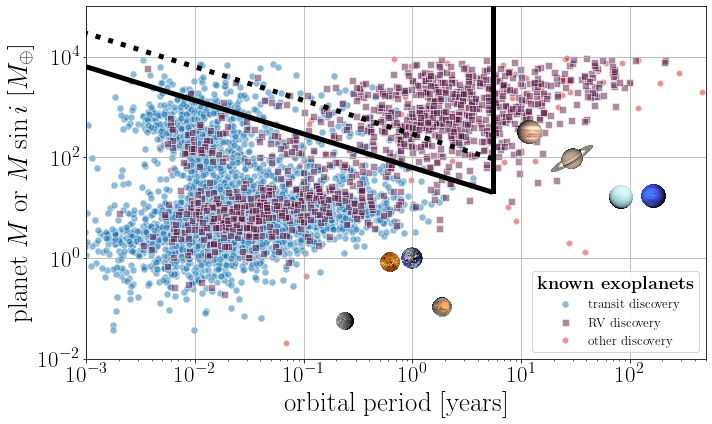

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


from matplotlib.lines import Line2D
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as kde  # Make sure to import kde if not done yet

def plot_contour(data, label, color):
    if len(data) < 2:
        print(f"Not enough data points for {label}. Skipping contour.")
        return
    
    # Use kde to estimate density
    x = np.log10(data['Orbital_Period'] / 365.25)
    y = np.log10(data['Planet_Mass'])
    k = kde.gaussian_kde([x, y])
    
    # Create grid
    xi, yi = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    
    # Plot contour
    plt.contour(10**xi, 10**yi, zi.reshape(xi.shape), colors=color, levels=3, linewidths=5, alpha=0.9)

# Step 2: Filter relevant columns (semi-major axis, Mass, Detection Method)
df = data[['pl_orbper', 'pl_bmasse', 'disc_method']].dropna()

# Rename columns for clarity
df.rename(columns={'pl_orbper': 'Orbital_Period', 'pl_bmasse': 'Planet_Mass', 'disc_method': 'Detection_Method'}, inplace=True)

# Step 3: Combine all non-'tran', non-'rv', non-'ttv' methods into 'Other'
df['Detection_Method'] = df['Detection_Method'].replace({'tran': 'Transit', 'rv': 'Radial Velocity'})
df['Detection_Method'] = df['Detection_Method'].where(df['Detection_Method'].isin(['Transit', 'Radial Velocity']), 'Other')

# Filter the DataFrame to include only relevant detection methods
df = df[df['Detection_Method'].isin(['Transit', 'Radial Velocity', 'Other'])]

# Filter data for 'Transit' and 'Radial Velocity' methods
transit_data = df[df['Detection_Method'] == 'Transit']
rv_data = df[df['Detection_Method'] == 'Radial Velocity']
other_data = df[df['Detection_Method'] == 'Other']

print(len(other_data) + len(rv_data) + len(transit_data))
print(len(df))

# Step 4: Plot mass (or mass*sin(i)) vs. semi-major axis diagram, color by detection method
fig, ax = plt.subplots(figsize=(10, 6))

# Create a scatter plot for Transit
transit_plot = ax.plot(
    transit_data['Orbital_Period'] / 365.25, transit_data['Planet_Mass'],
    color='#1F77B4', ls='', marker='o', ms=7, alpha=0.5, 
    markeredgecolor='white', zorder=-100000, label='transit discovery'
)

# Create a scatter plot for Radial Velocity
rv_plot = ax.plot(
    rv_data['Orbital_Period'] / 365.25, rv_data['Planet_Mass'],
    color='#581845', ls='', marker='s', ms=7, alpha=0.5, 
    markeredgecolor='white', zorder=-10000, label='RV discovery'
)

# Create a scatter plot for Other methods
other_plot = ax.plot(
    other_data['Orbital_Period'] / 365.25, other_data['Planet_Mass'],
    color='#D62728', ls='', marker='h', ms=7, alpha=0.5, 
    markeredgecolor='white', zorder=-1000000, label='other discovery'
)



# Define planet masses (in Earth masses) and orbital periods (in years)
planet_masses = np.linspace(10, 10**6, 1000)  # Planet masses from 10 to 1e6 Earth masses
planet_periods = np.linspace(1e-3, gaia_baseline, 10000)  # Planet periods from 1 to 100 years
mass_grid, period_grid = np.meshgrid(planet_masses, planet_periods)


# Define the fixed stellar mass (in solar masses) and distance (in parsecs)
fixed_stellar_mass = [.1, 1]  # 1 Solar Mass
fixed_distance = [50]     # 50 Parsecs

for dist in fixed_distance:
    for stellar_mass in fixed_stellar_mass:
        # Calculate the astrometric signal over the grid
        astrometric_signal_grid = 3 * mass_grid * (stellar_mass ** (-2 / 3)) * (period_grid ** (2 / 3)) * (dist ** (-1))

        if stellar_mass==.1:
            contour = ax.contour(period_grid, mass_grid, astrometric_signal_grid, levels=[detection_threshold], 
                                   linewidths=5, alpha=1, colors='k', zorder=10000, linestyles='solid')
        else:
            contour = ax.contour(period_grid, mass_grid, astrometric_signal_grid, levels=[detection_threshold], 
                                   linewidths=5, alpha=1, colors='k', zorder=10000, linestyles='dotted')

ax.axvline(gaia_baseline, 0.475, 1, color='k', lw=5, ls='solid')
ax.axvline(gaia_baseline, 0.57, 1, color='k', lw=5, ls='dotted')




#Add the Solar System planet images
#Uses the solution by Joe Kington from https://stackoverflow.com/questions/22566284/matplotlib-how-to-plot-images-instead-of-points
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists


#orbital periods from https://www.princeton.edu/~willman/planetary_systems/Sol/
#masses from perry microlensing roman paper code 
planetsize=0.1
imscatter([0.2408467],[0.055], 'mercury.png',ax=ax,zoom=planetsize*0.3)
imscatter([0.61519726],[0.815], 'venus.png',ax=ax,zoom=planetsize*0.9)
imscatter([1.0000174],[1],'Earth_Western_Hemisphere_transparent_background.png',ax=ax,zoom=planetsize)
imscatter([1.8808158],[0.107], 'mars.png',ax=ax,zoom=planetsize*240/500.0*0.9)
imscatter([11.862615],[317.8],'jupiter.png',ax=ax,zoom=planetsize)
imscatter([29.447498],[95.152],'saturn.png',ax=ax,zoom=planetsize*1.35)
imscatter([84.016846],[15.91],'uranus.png',ax=ax,zoom=planetsize)
imscatter([164.79132],[17.147],'neptune.png',ax=ax,zoom=planetsize)






# Axis limits
Mmin = 1e-2
Mmax = 1e5
Pmin = 1e-3
Pmax = 5e2
ax.set_xlim([Pmin, Pmax])
ax.set_ylim([Mmin, Mmax])

plt.grid(which='major')

# Set log scale
plt.xscale('log')
plt.yscale('log')

# Labels and title
plt.xlabel('orbital period [years]', fontsize=27)
plt.ylabel(r'planet $M$ or $M\sin{i}$ [$M_\oplus$]', fontsize=27)

# Add legend with title
legend = plt.legend(
    all_legend_handles, all_legend_labels, 
    title=r'$\textbf{known exoplanets}$', loc='lower right', 
    fontsize=13
)
plt.setp(legend.get_title(), fontsize=18)  # Change the legend title font size if needed

plt.tight_layout()

plt.savefig('exoplanet_demographics_wGaia.pdf')
plt.show()


5686
5686
Number of data points for Transit: 4431
Number of data points for Radial Velocity: 1145
Number of data points for Other: 110


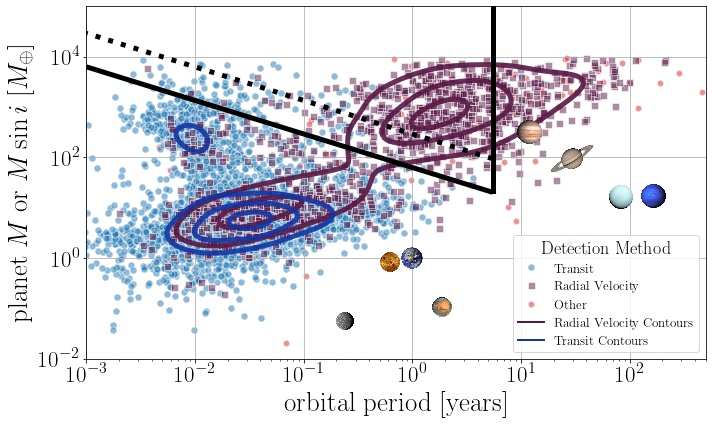

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


from matplotlib.lines import Line2D
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as kde  # Make sure to import kde if not done yet

def plot_contour(data, label, color):
    if len(data) < 2:
        print(f"Not enough data points for {label}. Skipping contour.")
        return
    
    # Use kde to estimate density
    x = np.log10(data['Orbital_Period'] / 365.25)
    y = np.log10(data['Planet_Mass'])
    k = kde.gaussian_kde([x, y])
    
    # Create grid
    xi, yi = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    
    # Plot contour
    plt.contour(10**xi, 10**yi, zi.reshape(xi.shape), colors=color, levels=3, linewidths=5, alpha=0.9)

# Step 2: Filter relevant columns (semi-major axis, Mass, Detection Method)
df = data[['pl_orbper', 'pl_bmasse', 'disc_method']].dropna()

# Rename columns for clarity
df.rename(columns={'pl_orbper': 'Orbital_Period', 'pl_bmasse': 'Planet_Mass', 'disc_method': 'Detection_Method'}, inplace=True)

# Step 3: Combine all non-'tran', non-'rv', non-'ttv' methods into 'Other'
df['Detection_Method'] = df['Detection_Method'].replace({'tran': 'Transit', 'rv': 'Radial Velocity'})
df['Detection_Method'] = df['Detection_Method'].where(df['Detection_Method'].isin(['Transit', 'Radial Velocity']), 'Other')

# Filter the DataFrame to include only relevant detection methods
df = df[df['Detection_Method'].isin(['Transit', 'Radial Velocity', 'Other'])]

# Filter data for 'Transit' and 'Radial Velocity' methods
transit_data = df[df['Detection_Method'] == 'Transit']
rv_data = df[df['Detection_Method'] == 'Radial Velocity']
other_data = df[df['Detection_Method'] == 'Other']

print(len(other_data) + len(rv_data) + len(transit_data))
print(len(df))

# Step 4: Plot mass (or mass*sin(i)) vs. semi-major axis diagram, color by detection method
fig, ax = plt.subplots(figsize=(10, 6))

# Create a scatter plot for Transit
transit_plot = ax.plot(
    transit_data['Orbital_Period'] / 365.25, transit_data['Planet_Mass'],
    color='#1F77B4', ls='', marker='o', ms=7, alpha=0.5, 
    markeredgecolor='white', zorder=-100000, label='Transit'
)

# Create a scatter plot for Radial Velocity
rv_plot = ax.plot(
    rv_data['Orbital_Period'] / 365.25, rv_data['Planet_Mass'],
    color='#581845', ls='', marker='s', ms=7, alpha=0.5, 
    markeredgecolor='white', zorder=-10000, label='Radial Velocity'
)

# Create a scatter plot for Other methods
other_plot = ax.plot(
    other_data['Orbital_Period'] / 365.25, other_data['Planet_Mass'],
    color='#D62728', ls='', marker='h', ms=7, alpha=0.5, 
    markeredgecolor='white', zorder=-1000000, label='Other'
)

# Plot contours for Transit and Radial Velocity
print(f"Number of data points for Transit: {len(transit_data)}")
print(f"Number of data points for Radial Velocity: {len(rv_data)}")
print(f"Number of data points for Other: {len(other_data)}")

# Call the contour plotting function for both Transit and Radial Velocity
plot_contour(rv_data, 'Radial Velocity Contours', '#581845')
plot_contour(transit_data, 'Transit Contours', '#1434A4')

# Create legend handles from contour plots
contour_handles = [
    Line2D([0], [0], color='#581845', lw=2, label='Radial Velocity Contours'),
    Line2D([0], [0], color='#1434A4', lw=2, label='Transit Contours')
]

# Combine the original scatter handles with the custom contour handles
# Use only handles, no labels here to avoid mismatch
scatter_handles, scatter_labels = ax.get_legend_handles_labels()
all_legend_handles = scatter_handles + contour_handles
all_legend_labels = scatter_labels + [handle.get_label() for handle in contour_handles]




# Define planet masses (in Earth masses) and orbital periods (in years)
planet_masses = np.linspace(10, 10**6, 1000)  # Planet masses from 10 to 1e6 Earth masses
planet_periods = np.linspace(1e-3, gaia_baseline, 10000)  # Planet periods from 1 to 100 years
mass_grid, period_grid = np.meshgrid(planet_masses, planet_periods)


# Define the fixed stellar mass (in solar masses) and distance (in parsecs)
fixed_stellar_mass = [.1, 1]  # 1 Solar Mass
fixed_distance = [50]     # 50 Parsecs

for dist in fixed_distance:
    for stellar_mass in fixed_stellar_mass:
        # Calculate the astrometric signal over the grid
        astrometric_signal_grid = 3 * mass_grid * (stellar_mass ** (-2 / 3)) * (period_grid ** (2 / 3)) * (dist ** (-1))

        if stellar_mass==.1:
            contour = ax.contour(period_grid, mass_grid, astrometric_signal_grid, levels=[detection_threshold], 
                                   linewidths=5, alpha=1, colors='k', zorder=10000, linestyles='solid')
        else:
            contour = ax.contour(period_grid, mass_grid, astrometric_signal_grid, levels=[detection_threshold], 
                                   linewidths=5, alpha=1, colors='k', zorder=10000, linestyles='dotted')

ax.axvline(gaia_baseline, 0.475, 1, color='k', lw=5, ls='solid')
ax.axvline(gaia_baseline, 0.57, 1, color='k', lw=5, ls='dotted')




#Add the Solar System planet images
#Uses the solution by Joe Kington from https://stackoverflow.com/questions/22566284/matplotlib-how-to-plot-images-instead-of-points
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists


#orbital periods from https://www.princeton.edu/~willman/planetary_systems/Sol/
#masses from perry microlensing roman paper code 
planetsize=0.1
imscatter([0.2408467],[0.055], 'mercury.png',ax=ax,zoom=planetsize*0.3)
imscatter([0.61519726],[0.815], 'venus.png',ax=ax,zoom=planetsize*0.9)
imscatter([1.0000174],[1],'Earth_Western_Hemisphere_transparent_background.png',ax=ax,zoom=planetsize)
imscatter([1.8808158],[0.107], 'mars.png',ax=ax,zoom=planetsize*240/500.0*0.9)
imscatter([11.862615],[317.8],'jupiter.png',ax=ax,zoom=planetsize)
imscatter([29.447498],[95.152],'saturn.png',ax=ax,zoom=planetsize*1.35)
imscatter([84.016846],[15.91],'uranus.png',ax=ax,zoom=planetsize)
imscatter([164.79132],[17.147],'neptune.png',ax=ax,zoom=planetsize)






# Axis limits
Mmin = 1e-2
Mmax = 1e5
Pmin = 1e-3
Pmax = 5e2
ax.set_xlim([Pmin, Pmax])
ax.set_ylim([Mmin, Mmax])

plt.grid(which='major')

# Set log scale
plt.xscale('log')
plt.yscale('log')

# Labels and title
plt.xlabel('orbital period [years]', fontsize=27)
plt.ylabel(r'planet $M$ or $M\sin{i}$ [$M_\oplus$]', fontsize=27)

# Add legend with title
legend = plt.legend(
    all_legend_handles, all_legend_labels, 
    title='Detection Method', loc='lower right', 
    fontsize=13
)
plt.setp(legend.get_title(), fontsize=18)  # Change the legend title font size if needed

plt.tight_layout()

plt.savefig('exoplanet_demographics_wGaia.pdf')
plt.show()



5686
5686
Number of data points for Transit: 4431
Number of data points for Radial Velocity: 1145
Number of data points for Other: 110


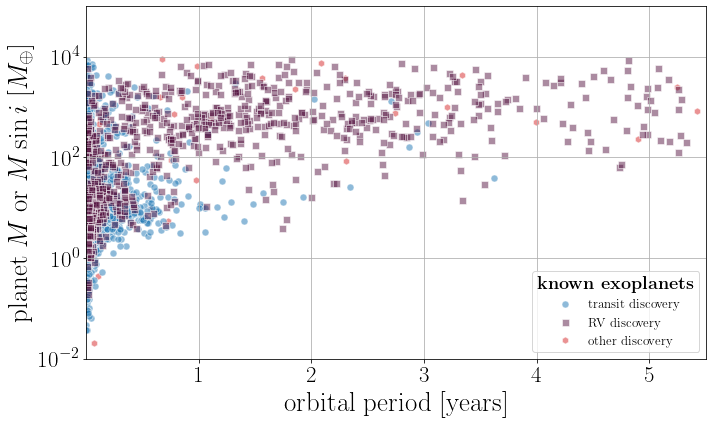

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


from matplotlib.lines import Line2D
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as kde  # Make sure to import kde if not done yet

def plot_contour(data, label, color):
    if len(data) < 2:
        print(f"Not enough data points for {label}. Skipping contour.")
        return
    
    # Use kde to estimate density
    x = np.log10(data['Orbital_Period'] / 365.25)
    y = np.log10(data['Planet_Mass'])
    k = kde.gaussian_kde([x, y])
    
    # Create grid
    xi, yi = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    
    # Plot contour
    plt.contour(10**xi, 10**yi, zi.reshape(xi.shape), colors=color, levels=3, linewidths=5, alpha=0.9)

# Step 2: Filter relevant columns (semi-major axis, Mass, Detection Method)
df = data[['pl_orbper', 'pl_bmasse', 'disc_method']].dropna()

# Rename columns for clarity
df.rename(columns={'pl_orbper': 'Orbital_Period', 'pl_bmasse': 'Planet_Mass', 'disc_method': 'Detection_Method'}, inplace=True)

# Step 3: Combine all non-'tran', non-'rv', non-'ttv' methods into 'Other'
df['Detection_Method'] = df['Detection_Method'].replace({'tran': 'transit', 'rv': 'RV'})
df['Detection_Method'] = df['Detection_Method'].where(df['Detection_Method'].isin(['transit', 'RV']), 'other')

# Filter the DataFrame to include only relevant detection methods
df = df[df['Detection_Method'].isin(['transit', 'RV', 'other'])]

# Filter data for 'Transit' and 'Radial Velocity' methods
transit_data = df[df['Detection_Method'] == 'transit']
rv_data = df[df['Detection_Method'] == 'RV']
other_data = df[df['Detection_Method'] == 'other']

print(len(other_data) + len(rv_data) + len(transit_data))
print(len(df))

# Step 4: Plot mass (or mass*sin(i)) vs. semi-major axis diagram, color by detection method
fig, ax = plt.subplots(figsize=(10, 6))

# Create a scatter plot for Transit
transit_plot = ax.plot(
    transit_data['Orbital_Period'] / 365.25, transit_data['Planet_Mass'],
    color='#1F77B4', ls='', marker='o', ms=7, alpha=0.5, 
    markeredgecolor='white', zorder=-100000, label='transit discovery'
)

# Create a scatter plot for Radial Velocity
rv_plot = ax.plot(
    rv_data['Orbital_Period'] / 365.25, rv_data['Planet_Mass'],
    color='#581845', ls='', marker='s', ms=7, alpha=0.5, 
    markeredgecolor='white', zorder=-10000, label='RV discovery'
)

# Create a scatter plot for Other methods
other_plot = ax.plot(
    other_data['Orbital_Period'] / 365.25, other_data['Planet_Mass'],
    color='#D62728', ls='', marker='h', ms=7, alpha=0.5, 
    markeredgecolor='white', zorder=-1000000, label='other discovery'
)

# Plot contours for Transit and Radial Velocity
print(f"Number of data points for Transit: {len(transit_data)}")
print(f"Number of data points for Radial Velocity: {len(rv_data)}")
print(f"Number of data points for Other: {len(other_data)}")

# Call the contour plotting function for both Transit and Radial Velocity
#plot_contour(rv_data, 'Radial Velocity Contours', '#581845')
#plot_contour(transit_data, 'Transit Contours', '#1434A4')

# Create legend handles from contour plots
contour_handles = [
    Line2D([0], [0], color='#581845', lw=2, label='Radial Velocity Contours'),
    Line2D([0], [0], color='#1434A4', lw=2, label='Transit Contours')
]

# Combine the original scatter handles with the custom contour handles
# Use only handles, no labels here to avoid mismatch
scatter_handles, scatter_labels = ax.get_legend_handles_labels()
all_legend_handles = scatter_handles
all_legend_labels = scatter_labels
#all_legend_handles = scatter_handles + contour_handles
#all_legend_labels = scatter_labels + [handle.get_label() for handle in contour_handles]







'''
# Add the Solar System planet images
# Uses the solution by Joe Kington from https://stackoverflow.com/questions/22566284/matplotlib-how-to-plot-images-instead-of-points
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def imscatter(x, y, image, ax=None, zoom=1, dpi=1000):
    if ax is None:
        ax = plt.gca()
    try:
        # Load the image with higher resolution (if available)
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom, dpi_cor=dpi)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists


# Orbital periods from https://www.princeton.edu/~willman/planetary_systems/Sol/
# Masses from perry microlensing roman paper code 
planetsize = 0.1
imscatter([0.2408467], [0.055], 'mercury.png', ax=ax, zoom=planetsize * 0.3)
imscatter([0.61519726], [0.815], 'venus.png', ax=ax, zoom=planetsize * 0.9)
imscatter([1.0000174], [1], 'Earth_Western_Hemisphere_transparent_background.png', ax=ax, zoom=planetsize)
imscatter([1.8808158], [0.107], 'mars.png', ax=ax, zoom=planetsize * 240 / 500.0 * 0.9)
imscatter([11.862615], [317.8], 'jupiter.png', ax=ax, zoom=planetsize)
imscatter([29.447498], [95.152], 'saturn.png', ax=ax, zoom=planetsize * 1.35)
imscatter([84.016846], [15.91], 'uranus.png', ax=ax, zoom=planetsize)
imscatter([164.79132], [17.147], 'neptune.png', ax=ax, zoom=planetsize)


'''



# Axis limits
Mmin = 1e-2
Mmax = 1e5
Pmin = .001
Pmax = 5.5
ax.set_xlim([Pmin, Pmax])
ax.set_ylim([Mmin, Mmax])

plt.grid(which='major')

# Set log scale
#plt.xscale('log')
plt.yscale('log')

# Labels and title
plt.xlabel('orbital period [years]', fontsize=27)
plt.ylabel(r'planet $M$ or $M\sin{i}$ [$M_\oplus$]', fontsize=27)

# Add legend with title
legend = plt.legend(
    all_legend_handles, all_legend_labels, 
    title=r'$\textbf{known exoplanets}$', loc='lower right', 
    fontsize=13
)
plt.setp(legend.get_title(), fontsize=18)  # Change the legend title font size if needed

plt.tight_layout()

plt.savefig('exoplanet_demographics_noGaia_zoom.pdf')
plt.show()

5686
5686
Number of data points for Transit: 4431
Number of data points for Radial Velocity: 1145
Number of data points for Other: 110


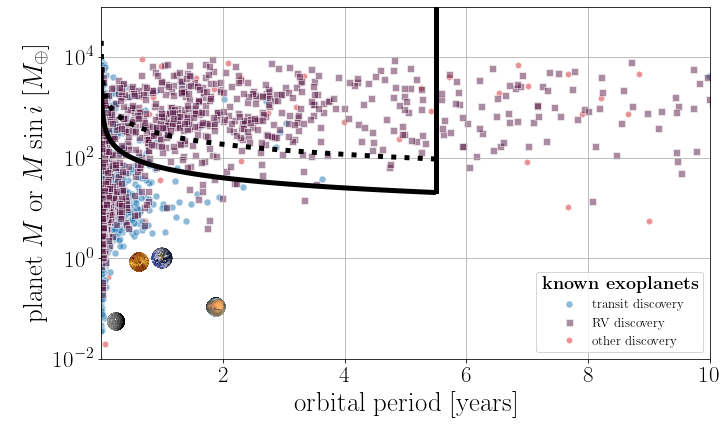

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


from matplotlib.lines import Line2D
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as kde  # Make sure to import kde if not done yet

def plot_contour(data, label, color):
    if len(data) < 2:
        print(f"Not enough data points for {label}. Skipping contour.")
        return
    
    # Use kde to estimate density
    x = np.log10(data['Orbital_Period'] / 365.25)
    y = np.log10(data['Planet_Mass'])
    k = kde.gaussian_kde([x, y])
    
    # Create grid
    xi, yi = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    
    # Plot contour
    plt.contour(10**xi, 10**yi, zi.reshape(xi.shape), colors=color, levels=3, linewidths=5, alpha=0.9)

# Step 2: Filter relevant columns (semi-major axis, Mass, Detection Method)
df = data[['pl_orbper', 'pl_bmasse', 'disc_method']].dropna()

# Rename columns for clarity
df.rename(columns={'pl_orbper': 'Orbital_Period', 'pl_bmasse': 'Planet_Mass', 'disc_method': 'Detection_Method'}, inplace=True)

# Step 3: Combine all non-'tran', non-'rv', non-'ttv' methods into 'Other'
df['Detection_Method'] = df['Detection_Method'].replace({'tran': 'transit', 'rv': 'RV'})
df['Detection_Method'] = df['Detection_Method'].where(df['Detection_Method'].isin(['transit', 'RV']), 'other')

# Filter the DataFrame to include only relevant detection methods
df = df[df['Detection_Method'].isin(['transit', 'RV', 'other'])]

# Filter data for 'Transit' and 'Radial Velocity' methods
transit_data = df[df['Detection_Method'] == 'transit']
rv_data = df[df['Detection_Method'] == 'RV']
other_data = df[df['Detection_Method'] == 'other']

print(len(other_data) + len(rv_data) + len(transit_data))
print(len(df))

# Step 4: Plot mass (or mass*sin(i)) vs. semi-major axis diagram, color by detection method
fig, ax = plt.subplots(figsize=(10, 6))

# Create a scatter plot for Transit
transit_plot = ax.plot(
    transit_data['Orbital_Period'] / 365.25, transit_data['Planet_Mass'],
    color='#1F77B4', ls='', marker='o', ms=7, alpha=0.5, 
    markeredgecolor='white', zorder=-100000, label='transit discovery'
)

# Create a scatter plot for Radial Velocity
rv_plot = ax.plot(
    rv_data['Orbital_Period'] / 365.25, rv_data['Planet_Mass'],
    color='#581845', ls='', marker='s', ms=7, alpha=0.5, 
    markeredgecolor='white', zorder=-10000, label='RV discovery'
)

# Create a scatter plot for Other methods
other_plot = ax.plot(
    other_data['Orbital_Period'] / 365.25, other_data['Planet_Mass'],
    color='#D62728', ls='', marker='h', ms=7, alpha=0.5, 
    markeredgecolor='white', zorder=-1000000, label='other discovery'
)

# Plot contours for Transit and Radial Velocity
print(f"Number of data points for Transit: {len(transit_data)}")
print(f"Number of data points for Radial Velocity: {len(rv_data)}")
print(f"Number of data points for Other: {len(other_data)}")

# Call the contour plotting function for both Transit and Radial Velocity
#plot_contour(rv_data, 'Radial Velocity Contours', '#581845')
#plot_contour(transit_data, 'Transit Contours', '#1434A4')

# Create legend handles from contour plots
contour_handles = [
    Line2D([0], [0], color='#581845', lw=2, label='Radial Velocity Contours'),
    Line2D([0], [0], color='#1434A4', lw=2, label='Transit Contours')
]

# Combine the original scatter handles with the custom contour handles
# Use only handles, no labels here to avoid mismatch
scatter_handles, scatter_labels = ax.get_legend_handles_labels()
all_legend_handles = scatter_handles
all_legend_labels = scatter_labels
#all_legend_handles = scatter_handles + contour_handles
#all_legend_labels = scatter_labels + [handle.get_label() for handle in contour_handles]




# Define planet masses (in Earth masses) and orbital periods (in years)
planet_masses = np.linspace(10, 10**6, 1000)  # Planet masses from 10 to 1e6 Earth masses
planet_periods = np.linspace(1e-3, gaia_baseline, 10000)  # Planet periods from 1 to 100 years
mass_grid, period_grid = np.meshgrid(planet_masses, planet_periods)


# Define the fixed stellar mass (in solar masses) and distance (in parsecs)
fixed_stellar_mass = [.1, 1]  # 1 Solar Mass
fixed_distance = [50]     # 50 Parsecs

for dist in fixed_distance:
    for stellar_mass in fixed_stellar_mass:
        # Calculate the astrometric signal over the grid
        astrometric_signal_grid = 3 * mass_grid * (stellar_mass ** (-2 / 3)) * (period_grid ** (2 / 3)) * (dist ** (-1))

        if stellar_mass==.1:
            contour = ax.contour(period_grid, mass_grid, astrometric_signal_grid, levels=[detection_threshold], 
                                   linewidths=5, alpha=1, colors='k', zorder=10000, linestyles='solid')
        else:
            contour = ax.contour(period_grid, mass_grid, astrometric_signal_grid, levels=[detection_threshold], 
                                   linewidths=5, alpha=1, colors='k', zorder=10000, linestyles='dotted')

ax.axvline(gaia_baseline, 0.475, 1, color='k', lw=5, ls='solid')
ax.axvline(gaia_baseline, 0.57, 1, color='k', lw=5, ls='dotted')



# Add the Solar System planet images
# Uses the solution by Joe Kington from https://stackoverflow.com/questions/22566284/matplotlib-how-to-plot-images-instead-of-points
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def imscatter(x, y, image, ax=None, zoom=1, dpi=1000):
    if ax is None:
        ax = plt.gca()
    try:
        # Load the image with higher resolution (if available)
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom, dpi_cor=dpi)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists


# Orbital periods from https://www.princeton.edu/~willman/planetary_systems/Sol/
# Masses from perry microlensing roman paper code 
planetsize = 0.1
imscatter([0.2408467], [0.055], 'mercury.png', ax=ax, zoom=planetsize * 0.3)
imscatter([0.61519726], [0.815], 'venus.png', ax=ax, zoom=planetsize * 0.9)
imscatter([1.0000174], [1], 'Earth_Western_Hemisphere_transparent_background.png', ax=ax, zoom=planetsize)
imscatter([1.8808158], [0.107], 'mars.png', ax=ax, zoom=planetsize * 240 / 500.0 * 0.9)
imscatter([11.862615], [317.8], 'jupiter.png', ax=ax, zoom=planetsize)
imscatter([29.447498], [95.152], 'saturn.png', ax=ax, zoom=planetsize * 1.35)
imscatter([84.016846], [15.91], 'uranus.png', ax=ax, zoom=planetsize)
imscatter([164.79132], [17.147], 'neptune.png', ax=ax, zoom=planetsize)






# Axis limits
Mmin = 1e-2
Mmax = 1e5
Pmin = .001
Pmax = 10
ax.set_xlim([Pmin, Pmax])
ax.set_ylim([Mmin, Mmax])

plt.grid(which='major')

# Set log scale
#plt.xscale('log')
plt.yscale('log')

# Labels and title
plt.xlabel('orbital period [years]', fontsize=27)
plt.ylabel(r'planet $M$ or $M\sin{i}$ [$M_\oplus$]', fontsize=27)

# Add legend with title
legend = plt.legend(
    all_legend_handles, all_legend_labels, 
    title=r'$\textbf{known exoplanets}$', loc='lower right', 
    fontsize=13
)
plt.setp(legend.get_title(), fontsize=18)  # Change the legend title font size if needed

plt.tight_layout()

plt.savefig('exoplanet_demographics_wGaia_zoom_10yr.pdf')
plt.show()

In [12]:
import numpy as np

# Define the constant
gaia_precision = 34.2

# Generate x values from 0 to 90 degrees
x_values = np.linspace(0, 90, 1000)  # 1000 points from 0 to 90 degrees

# Compute the expression
y_values = (5 * gaia_precision * np.sin(np.radians(x_values)) + gaia_precision * np.cos(np.radians(x_values)))

# Calculate the median
gaia_precision_scanning = np.median(y_values)

# Print the median value
print("gaia scanning per obs [uas]: ", gaia_precision_scanning)


# Detection threshold: Change this value to adjust the detection threshold
# 68.9 is #obs per 5 year primary mission fro Perryman et al 2014 so lets 2x it for 10 years
full_gaia_detection_threshold = gaia_precision_scanning / np.sqrt(2*68.9)  # µas
print('complete Gaia precision [uas]: ', full_gaia_detection_threshold)


#gaia_baseline dr4 = 66 months
full_gaia_baseline = 10
print('complete Gaia baseline [years]: ', full_gaia_baseline)


gaia scanning per obs [uas]:  145.09826665787682
complete Gaia precision [uas]:  12.360544873617686
complete Gaia baseline [years]:  10


5686
5686
Number of data points for Transit: 4431
Number of data points for Radial Velocity: 1145
Number of data points for Other: 110


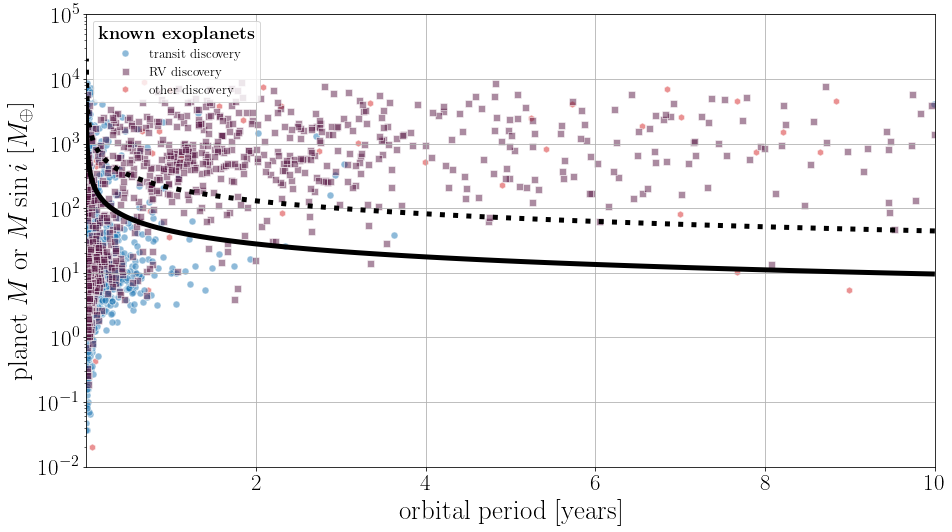

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


from matplotlib.lines import Line2D
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as kde  # Make sure to import kde if not done yet

def plot_contour(data, label, color):
    if len(data) < 2:
        print(f"Not enough data points for {label}. Skipping contour.")
        return
    
    # Use kde to estimate density
    x = np.log10(data['Orbital_Period'] / 365.25)
    y = np.log10(data['Planet_Mass'])
    k = kde.gaussian_kde([x, y])
    
    # Create grid
    xi, yi = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    
    # Plot contour
    plt.contour(10**xi, 10**yi, zi.reshape(xi.shape), colors=color, levels=3, linewidths=5, alpha=0.9)

# Step 2: Filter relevant columns (semi-major axis, Mass, Detection Method)
df = data[['pl_orbper', 'pl_bmasse', 'disc_method']].dropna()

# Rename columns for clarity
df.rename(columns={'pl_orbper': 'Orbital_Period', 'pl_bmasse': 'Planet_Mass', 'disc_method': 'Detection_Method'}, inplace=True)

# Step 3: Combine all non-'tran', non-'rv', non-'ttv' methods into 'Other'
df['Detection_Method'] = df['Detection_Method'].replace({'tran': 'transit', 'rv': 'RV'})
df['Detection_Method'] = df['Detection_Method'].where(df['Detection_Method'].isin(['transit', 'RV']), 'other')

# Filter the DataFrame to include only relevant detection methods
df = df[df['Detection_Method'].isin(['transit', 'RV', 'other'])]

# Filter data for 'Transit' and 'Radial Velocity' methods
transit_data = df[df['Detection_Method'] == 'transit']
rv_data = df[df['Detection_Method'] == 'RV']
other_data = df[df['Detection_Method'] == 'other']

print(len(other_data) + len(rv_data) + len(transit_data))
print(len(df))

# Step 4: Plot mass (or mass*sin(i)) vs. semi-major axis diagram, color by detection method
fig, ax = plt.subplots(figsize=(13.33, 7.5))

# Create a scatter plot for Transit
transit_plot = ax.plot(
    transit_data['Orbital_Period'] / 365.25, transit_data['Planet_Mass'],
    color='#1F77B4', ls='', marker='o', ms=7, alpha=0.5, 
    markeredgecolor='white', zorder=-100000, label='transit discovery'
)

# Create a scatter plot for Radial Velocity
rv_plot = ax.plot(
    rv_data['Orbital_Period'] / 365.25, rv_data['Planet_Mass'],
    color='#581845', ls='', marker='s', ms=7, alpha=0.5, 
    markeredgecolor='white', zorder=-10000, label='RV discovery'
)

# Create a scatter plot for Other methods
other_plot = ax.plot(
    other_data['Orbital_Period'] / 365.25, other_data['Planet_Mass'],
    color='#D62728', ls='', marker='h', ms=7, alpha=0.5, 
    markeredgecolor='white', zorder=-1000000, label='other discovery'
)

# Plot contours for Transit and Radial Velocity
print(f"Number of data points for Transit: {len(transit_data)}")
print(f"Number of data points for Radial Velocity: {len(rv_data)}")
print(f"Number of data points for Other: {len(other_data)}")

# Call the contour plotting function for both Transit and Radial Velocity
#plot_contour(rv_data, 'Radial Velocity Contours', '#581845')
#plot_contour(transit_data, 'Transit Contours', '#1434A4')

# Create legend handles from contour plots
contour_handles = [
    Line2D([0], [0], color='#581845', lw=2, label='Radial Velocity Contours'),
    Line2D([0], [0], color='#1434A4', lw=2, label='Transit Contours')
]

# Combine the original scatter handles with the custom contour handles
# Use only handles, no labels here to avoid mismatch
scatter_handles, scatter_labels = ax.get_legend_handles_labels()
all_legend_handles = scatter_handles
all_legend_labels = scatter_labels
#all_legend_handles = scatter_handles + contour_handles
#all_legend_labels = scatter_labels + [handle.get_label() for handle in contour_handles]



# Define planet masses (in Earth masses) and orbital periods (in years)
planet_masses = np.linspace(1, 10**6, 1000)  # Planet masses from 10 to 1e6 Earth masses
planet_periods = np.linspace(1e-3, full_gaia_baseline, 10000)  # Planet periods from 1 to 100 years
mass_grid, period_grid = np.meshgrid(planet_masses, planet_periods)


# Define the fixed stellar mass (in solar masses) and distance (in parsecs)
fixed_stellar_mass = [.1, 1]  # 1 Solar Mass
fixed_distance = [50]     # 50 Parsecs

for dist in fixed_distance:
    for stellar_mass in fixed_stellar_mass:
        # Calculate the astrometric signal over the grid
        astrometric_signal_grid = 3 * mass_grid * (stellar_mass ** (-2 / 3)) * (period_grid ** (2 / 3)) * (dist ** (-1))

        if stellar_mass==.1:
            contour = ax.contour(period_grid, mass_grid, astrometric_signal_grid, levels=[full_gaia_detection_threshold], 
                                   linewidths=5, alpha=1, colors='k', zorder=10000, linestyles='solid')
        else:
            contour = ax.contour(period_grid, mass_grid, astrometric_signal_grid, levels=[full_gaia_detection_threshold], 
                                   linewidths=5, alpha=1, colors='k', zorder=10000, linestyles='dotted')





'''
# Add the Solar System planet images
# Uses the solution by Joe Kington from https://stackoverflow.com/questions/22566284/matplotlib-how-to-plot-images-instead-of-points
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def imscatter(x, y, image, ax=None, zoom=1, dpi=1000):
    if ax is None:
        ax = plt.gca()
    try:
        # Load the image with higher resolution (if available)
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom, dpi_cor=dpi)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists


# Orbital periods from https://www.princeton.edu/~willman/planetary_systems/Sol/
# Masses from perry microlensing roman paper code 
planetsize = 0.1
imscatter([0.2408467], [0.055], 'mercury.png', ax=ax, zoom=planetsize * 0.3)
imscatter([0.61519726], [0.815], 'venus.png', ax=ax, zoom=planetsize * 0.9)
imscatter([1.0000174], [1], 'Earth_Western_Hemisphere_transparent_background.png', ax=ax, zoom=planetsize)
imscatter([1.8808158], [0.107], 'mars.png', ax=ax, zoom=planetsize * 240 / 500.0 * 0.9)
imscatter([11.862615], [317.8], 'jupiter.png', ax=ax, zoom=planetsize)
imscatter([29.447498], [95.152], 'saturn.png', ax=ax, zoom=planetsize * 1.35)
imscatter([84.016846], [15.91], 'uranus.png', ax=ax, zoom=planetsize)
imscatter([164.79132], [17.147], 'neptune.png', ax=ax, zoom=planetsize)


'''



# Axis limits
Mmin = 1e-2
Mmax = 1e5
Pmin = .001
Pmax = 10
ax.set_xlim([Pmin, Pmax])
ax.set_ylim([Mmin, Mmax])

plt.grid(which='major')

# Set log scale
#plt.xscale('log')
plt.yscale('log')

# Labels and title
plt.xlabel('orbital period [years]', fontsize=27)
plt.ylabel(r'planet $M$ or $M\sin{i}$ [$M_\oplus$]', fontsize=27)

# Add legend with title
legend = plt.legend(
    all_legend_handles, all_legend_labels, 
    title=r'$\textbf{known exoplanets}$', loc=2, 
    fontsize=13
)
plt.setp(legend.get_title(), fontsize=18)  # Change the legend title font size if needed

plt.tight_layout()

plt.savefig('exoplanet_demographics_wfullGaia_zoom.pdf')
plt.show()


5686
5686
Number of data points for Transit: 4431
Number of data points for Radial Velocity: 1145
Number of data points for Other: 110


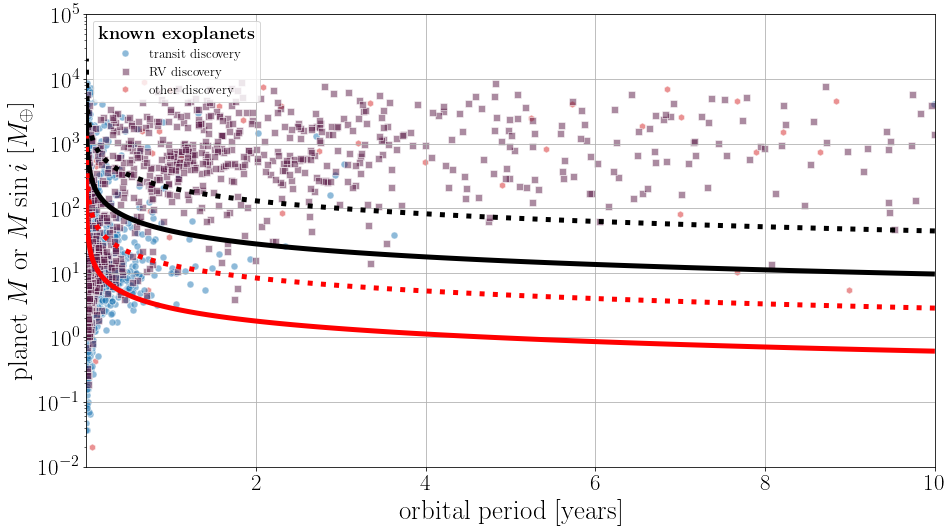

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


from matplotlib.lines import Line2D
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as kde  # Make sure to import kde if not done yet

def plot_contour(data, label, color):
    if len(data) < 2:
        print(f"Not enough data points for {label}. Skipping contour.")
        return
    
    # Use kde to estimate density
    x = np.log10(data['Orbital_Period'] / 365.25)
    y = np.log10(data['Planet_Mass'])
    k = kde.gaussian_kde([x, y])
    
    # Create grid
    xi, yi = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    
    # Plot contour
    plt.contour(10**xi, 10**yi, zi.reshape(xi.shape), colors=color, levels=3, linewidths=5, alpha=0.9)

# Step 2: Filter relevant columns (semi-major axis, Mass, Detection Method)
df = data[['pl_orbper', 'pl_bmasse', 'disc_method']].dropna()

# Rename columns for clarity
df.rename(columns={'pl_orbper': 'Orbital_Period', 'pl_bmasse': 'Planet_Mass', 'disc_method': 'Detection_Method'}, inplace=True)

# Step 3: Combine all non-'tran', non-'rv', non-'ttv' methods into 'Other'
df['Detection_Method'] = df['Detection_Method'].replace({'tran': 'transit', 'rv': 'RV'})
df['Detection_Method'] = df['Detection_Method'].where(df['Detection_Method'].isin(['transit', 'RV']), 'other')

# Filter the DataFrame to include only relevant detection methods
df = df[df['Detection_Method'].isin(['transit', 'RV', 'other'])]

# Filter data for 'Transit' and 'Radial Velocity' methods
transit_data = df[df['Detection_Method'] == 'transit']
rv_data = df[df['Detection_Method'] == 'RV']
other_data = df[df['Detection_Method'] == 'other']

print(len(other_data) + len(rv_data) + len(transit_data))
print(len(df))

# Step 4: Plot mass (or mass*sin(i)) vs. semi-major axis diagram, color by detection method
fig, ax = plt.subplots(figsize=(13.33, 7.5))

# Create a scatter plot for Transit
transit_plot = ax.plot(
    transit_data['Orbital_Period'] / 365.25, transit_data['Planet_Mass'],
    color='#1F77B4', ls='', marker='o', ms=7, alpha=0.5, 
    markeredgecolor='white', zorder=-100000, label='transit discovery'
)

# Create a scatter plot for Radial Velocity
rv_plot = ax.plot(
    rv_data['Orbital_Period'] / 365.25, rv_data['Planet_Mass'],
    color='#581845', ls='', marker='s', ms=7, alpha=0.5, 
    markeredgecolor='white', zorder=-10000, label='RV discovery'
)

# Create a scatter plot for Other methods
other_plot = ax.plot(
    other_data['Orbital_Period'] / 365.25, other_data['Planet_Mass'],
    color='#D62728', ls='', marker='h', ms=7, alpha=0.5, 
    markeredgecolor='white', zorder=-1000000, label='other discovery'
)

# Plot contours for Transit and Radial Velocity
print(f"Number of data points for Transit: {len(transit_data)}")
print(f"Number of data points for Radial Velocity: {len(rv_data)}")
print(f"Number of data points for Other: {len(other_data)}")

# Call the contour plotting function for both Transit and Radial Velocity
#plot_contour(rv_data, 'Radial Velocity Contours', '#581845')
#plot_contour(transit_data, 'Transit Contours', '#1434A4')

# Create legend handles from contour plots
contour_handles = [
    Line2D([0], [0], color='#581845', lw=2, label='Radial Velocity Contours'),
    Line2D([0], [0], color='#1434A4', lw=2, label='Transit Contours')
]

# Combine the original scatter handles with the custom contour handles
# Use only handles, no labels here to avoid mismatch
scatter_handles, scatter_labels = ax.get_legend_handles_labels()
all_legend_handles = scatter_handles
all_legend_labels = scatter_labels
#all_legend_handles = scatter_handles + contour_handles
#all_legend_labels = scatter_labels + [handle.get_label() for handle in contour_handles]



# Define planet masses (in Earth masses) and orbital periods (in years)
planet_masses = np.linspace(.1, 10**6, 1000)  # Planet masses from 10 to 1e6 Earth masses
planet_periods = np.linspace(1e-3, full_gaia_baseline, 10000)  # Planet periods from 1 to 100 years
mass_grid, period_grid = np.meshgrid(planet_masses, planet_periods)


# Define the fixed stellar mass (in solar masses) and distance (in parsecs)
fixed_stellar_mass = [.1, 1]  # 1 Solar Mass
fixed_distance = [50]     # 50 Parsecs

for dist in fixed_distance:
    for stellar_mass in fixed_stellar_mass:
        # Calculate the astrometric signal over the grid
        astrometric_signal_grid = 3 * mass_grid * (stellar_mass ** (-2 / 3)) * (period_grid ** (2 / 3)) * (dist ** (-1))

        if stellar_mass==.1:
            contour = ax.contour(period_grid, mass_grid, astrometric_signal_grid, levels=[full_gaia_detection_threshold], 
                                   linewidths=5, alpha=1, colors='k', zorder=10000, linestyles='solid')
        else:
            contour = ax.contour(period_grid, mass_grid, astrometric_signal_grid, levels=[full_gaia_detection_threshold], 
                                   linewidths=5, alpha=1, colors='k', zorder=10000, linestyles='dotted')



# add in roman also -- assume 5 uas precision per obs and 40 observations over lifetime of telescope
roman_detection_threshold = 5/np.sqrt(40)
for dist in fixed_distance:
    for stellar_mass in fixed_stellar_mass:
        # Calculate the astrometric signal over the grid
        astrometric_signal_grid = 3 * mass_grid * (stellar_mass ** (-2 / 3)) * (period_grid ** (2 / 3)) * (dist ** (-1))

        if stellar_mass==.1:
            contour = ax.contour(period_grid, mass_grid, astrometric_signal_grid, levels=[roman_detection_threshold], 
                                   linewidths=5, alpha=1, colors='r', zorder=10000, linestyles='solid')
        else:
            contour = ax.contour(period_grid, mass_grid, astrometric_signal_grid, levels=[roman_detection_threshold], 
                                   linewidths=5, alpha=1, colors='r', zorder=10000, linestyles='dotted')




'''
# Add the Solar System planet images
# Uses the solution by Joe Kington from https://stackoverflow.com/questions/22566284/matplotlib-how-to-plot-images-instead-of-points
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def imscatter(x, y, image, ax=None, zoom=1, dpi=1000):
    if ax is None:
        ax = plt.gca()
    try:
        # Load the image with higher resolution (if available)
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom, dpi_cor=dpi)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists


# Orbital periods from https://www.princeton.edu/~willman/planetary_systems/Sol/
# Masses from perry microlensing roman paper code 
planetsize = 0.1
imscatter([0.2408467], [0.055], 'mercury.png', ax=ax, zoom=planetsize * 0.3)
imscatter([0.61519726], [0.815], 'venus.png', ax=ax, zoom=planetsize * 0.9)
imscatter([1.0000174], [1], 'Earth_Western_Hemisphere_transparent_background.png', ax=ax, zoom=planetsize)
imscatter([1.8808158], [0.107], 'mars.png', ax=ax, zoom=planetsize * 240 / 500.0 * 0.9)
imscatter([11.862615], [317.8], 'jupiter.png', ax=ax, zoom=planetsize)
imscatter([29.447498], [95.152], 'saturn.png', ax=ax, zoom=planetsize * 1.35)
imscatter([84.016846], [15.91], 'uranus.png', ax=ax, zoom=planetsize)
imscatter([164.79132], [17.147], 'neptune.png', ax=ax, zoom=planetsize)


'''



# Axis limits
Mmin = 1e-2
Mmax = 1e5
Pmin = .001
Pmax = 10
ax.set_xlim([Pmin, Pmax])
ax.set_ylim([Mmin, Mmax])

plt.grid(which='major')

# Set log scale
#plt.xscale('log')
plt.yscale('log')

# Labels and title
plt.xlabel('orbital period [years]', fontsize=27)
plt.ylabel(r'planet $M$ or $M\sin{i}$ [$M_\oplus$]', fontsize=27)

# Add legend with title
legend = plt.legend(
    all_legend_handles, all_legend_labels, 
    title=r'$\textbf{known exoplanets}$', loc=2, 
    fontsize=13
)
plt.setp(legend.get_title(), fontsize=18)  # Change the legend title font size if needed

plt.tight_layout()

plt.savefig('exoplanet_demographics_wfullGaia_Roman_zoom.pdf')
plt.show()


5686
5686
Number of data points for Transit: 4431
Number of data points for Radial Velocity: 1145
Number of data points for Other: 110


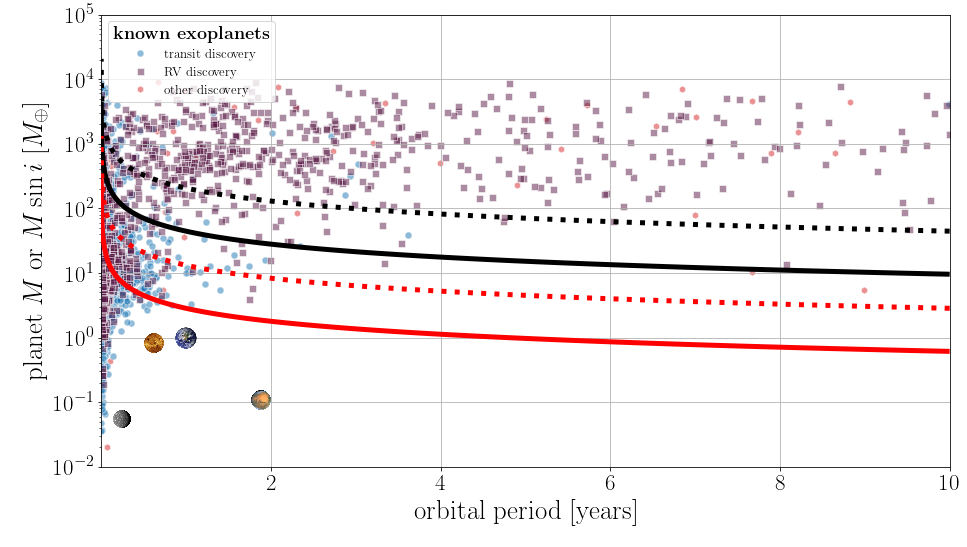

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


from matplotlib.lines import Line2D
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as kde  # Make sure to import kde if not done yet

def plot_contour(data, label, color):
    if len(data) < 2:
        print(f"Not enough data points for {label}. Skipping contour.")
        return
    
    # Use kde to estimate density
    x = np.log10(data['Orbital_Period'] / 365.25)
    y = np.log10(data['Planet_Mass'])
    k = kde.gaussian_kde([x, y])
    
    # Create grid
    xi, yi = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    
    # Plot contour
    plt.contour(10**xi, 10**yi, zi.reshape(xi.shape), colors=color, levels=3, linewidths=5, alpha=0.9)

# Step 2: Filter relevant columns (semi-major axis, Mass, Detection Method)
df = data[['pl_orbper', 'pl_bmasse', 'disc_method']].dropna()

# Rename columns for clarity
df.rename(columns={'pl_orbper': 'Orbital_Period', 'pl_bmasse': 'Planet_Mass', 'disc_method': 'Detection_Method'}, inplace=True)

# Step 3: Combine all non-'tran', non-'rv', non-'ttv' methods into 'Other'
df['Detection_Method'] = df['Detection_Method'].replace({'tran': 'transit', 'rv': 'RV'})
df['Detection_Method'] = df['Detection_Method'].where(df['Detection_Method'].isin(['transit', 'RV']), 'other')

# Filter the DataFrame to include only relevant detection methods
df = df[df['Detection_Method'].isin(['transit', 'RV', 'other'])]

# Filter data for 'Transit' and 'Radial Velocity' methods
transit_data = df[df['Detection_Method'] == 'transit']
rv_data = df[df['Detection_Method'] == 'RV']
other_data = df[df['Detection_Method'] == 'other']

print(len(other_data) + len(rv_data) + len(transit_data))
print(len(df))

# Step 4: Plot mass (or mass*sin(i)) vs. semi-major axis diagram, color by detection method
fig, ax = plt.subplots(figsize=(13.33, 7.5))

# Create a scatter plot for Transit
transit_plot = ax.plot(
    transit_data['Orbital_Period'] / 365.25, transit_data['Planet_Mass'],
    color='#1F77B4', ls='', marker='o', ms=7, alpha=0.5, 
    markeredgecolor='white', zorder=-100000, label='transit discovery'
)

# Create a scatter plot for Radial Velocity
rv_plot = ax.plot(
    rv_data['Orbital_Period'] / 365.25, rv_data['Planet_Mass'],
    color='#581845', ls='', marker='s', ms=7, alpha=0.5, 
    markeredgecolor='white', zorder=-10000, label='RV discovery'
)

# Create a scatter plot for Other methods
other_plot = ax.plot(
    other_data['Orbital_Period'] / 365.25, other_data['Planet_Mass'],
    color='#D62728', ls='', marker='h', ms=7, alpha=0.5, 
    markeredgecolor='white', zorder=-1000000, label='other discovery'
)

# Plot contours for Transit and Radial Velocity
print(f"Number of data points for Transit: {len(transit_data)}")
print(f"Number of data points for Radial Velocity: {len(rv_data)}")
print(f"Number of data points for Other: {len(other_data)}")

# Call the contour plotting function for both Transit and Radial Velocity
#plot_contour(rv_data, 'Radial Velocity Contours', '#581845')
#plot_contour(transit_data, 'Transit Contours', '#1434A4')

# Create legend handles from contour plots
contour_handles = [
    Line2D([0], [0], color='#581845', lw=2, label='Radial Velocity Contours'),
    Line2D([0], [0], color='#1434A4', lw=2, label='Transit Contours')
]

# Combine the original scatter handles with the custom contour handles
# Use only handles, no labels here to avoid mismatch
scatter_handles, scatter_labels = ax.get_legend_handles_labels()
all_legend_handles = scatter_handles
all_legend_labels = scatter_labels
#all_legend_handles = scatter_handles + contour_handles
#all_legend_labels = scatter_labels + [handle.get_label() for handle in contour_handles]



# Define planet masses (in Earth masses) and orbital periods (in years)
planet_masses = np.linspace(.1, 10**6, 1000)  # Planet masses from 10 to 1e6 Earth masses
planet_periods = np.linspace(1e-3, full_gaia_baseline, 10000)  # Planet periods from 1 to 100 years
mass_grid, period_grid = np.meshgrid(planet_masses, planet_periods)


# Define the fixed stellar mass (in solar masses) and distance (in parsecs)
fixed_stellar_mass = [.1, 1]  # 1 Solar Mass
fixed_distance = [50]     # 10 Parsecs

for dist in fixed_distance:
    for stellar_mass in fixed_stellar_mass:
        # Calculate the astrometric signal over the grid
        astrometric_signal_grid = 3 * mass_grid * (stellar_mass ** (-2 / 3)) * (period_grid ** (2 / 3)) * (dist ** (-1))

        if stellar_mass==.1:
            contour = ax.contour(period_grid, mass_grid, astrometric_signal_grid, levels=[full_gaia_detection_threshold], 
                                   linewidths=5, alpha=1, colors='k', zorder=10000, linestyles='solid')
        else:
            contour = ax.contour(period_grid, mass_grid, astrometric_signal_grid, levels=[full_gaia_detection_threshold], 
                                   linewidths=5, alpha=1, colors='k', zorder=10000, linestyles='dotted')



# add in roman also -- assume 5 uas precision per obs and 10 observations over lifetime of telescope
roman_detection_threshold = 5/np.sqrt(40)
for dist in fixed_distance:
    for stellar_mass in fixed_stellar_mass:
        # Calculate the astrometric signal over the grid
        astrometric_signal_grid = 3 * mass_grid * (stellar_mass ** (-2 / 3)) * (period_grid ** (2 / 3)) * (dist ** (-1))

        if stellar_mass==.1:
            contour = ax.contour(period_grid, mass_grid, astrometric_signal_grid, levels=[roman_detection_threshold], 
                                   linewidths=5, alpha=1, colors='r', zorder=10000, linestyles='solid')
        else:
            contour = ax.contour(period_grid, mass_grid, astrometric_signal_grid, levels=[roman_detection_threshold], 
                                   linewidths=5, alpha=1, colors='r', zorder=10000, linestyles='dotted')





# Add the Solar System planet images
# Uses the solution by Joe Kington from https://stackoverflow.com/questions/22566284/matplotlib-how-to-plot-images-instead-of-points
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def imscatter(x, y, image, ax=None, zoom=1, dpi=1000):
    if ax is None:
        ax = plt.gca()
    try:
        # Load the image with higher resolution (if available)
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom, dpi_cor=dpi)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists


# Orbital periods from https://www.princeton.edu/~willman/planetary_systems/Sol/
# Masses from perry microlensing roman paper code 
planetsize = 0.1
imscatter([0.2408467], [0.055], 'mercury.png', ax=ax, zoom=planetsize * 0.3)
imscatter([0.61519726], [0.815], 'venus.png', ax=ax, zoom=planetsize * 0.9)
imscatter([1.0000174], [1], 'Earth_Western_Hemisphere_transparent_background.png', ax=ax, zoom=planetsize)
imscatter([1.8808158], [0.107], 'mars.png', ax=ax, zoom=planetsize * 240 / 500.0 * 0.9)
imscatter([11.862615], [317.8], 'jupiter.png', ax=ax, zoom=planetsize)
imscatter([29.447498], [95.152], 'saturn.png', ax=ax, zoom=planetsize * 1.35)
imscatter([84.016846], [15.91], 'uranus.png', ax=ax, zoom=planetsize)
imscatter([164.79132], [17.147], 'neptune.png', ax=ax, zoom=planetsize)






# Axis limits
Mmin = 1e-2
Mmax = 1e5
Pmin = .001
Pmax = 10
ax.set_xlim([Pmin, Pmax])
ax.set_ylim([Mmin, Mmax])

plt.grid(which='major')

# Set log scale
#plt.xscale('log')
plt.yscale('log')

# Labels and title
plt.xlabel('orbital period [years]', fontsize=27)
plt.ylabel(r'planet $M$ or $M\sin{i}$ [$M_\oplus$]', fontsize=27)

# Add legend with title
legend = plt.legend(
    all_legend_handles, all_legend_labels, 
    title=r'$\textbf{known exoplanets}$', loc=2, 
    fontsize=13
)
plt.setp(legend.get_title(), fontsize=18)  # Change the legend title font size if needed

plt.tight_layout()

plt.savefig('exoplanet_demographics_wfullGaia_Roman_solarsystem_zoom.pdf')
plt.show()


5686
5686
Number of data points for Transit: 4431
Number of data points for Radial Velocity: 1145
Number of data points for Other: 110


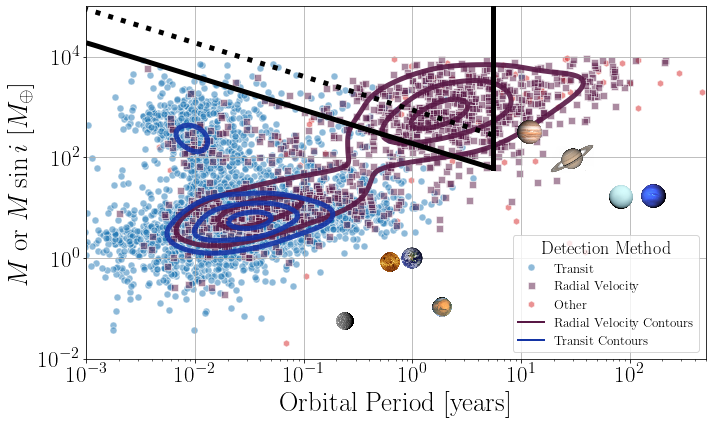

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


from matplotlib.lines import Line2D
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as kde  # Make sure to import kde if not done yet

def plot_contour(data, label, color):
    if len(data) < 2:
        print(f"Not enough data points for {label}. Skipping contour.")
        return
    
    # Use kde to estimate density
    x = np.log10(data['Orbital_Period'] / 365.25)
    y = np.log10(data['Planet_Mass'])
    k = kde.gaussian_kde([x, y])
    
    # Create grid
    xi, yi = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    
    # Plot contour
    plt.contour(10**xi, 10**yi, zi.reshape(xi.shape), colors=color, levels=3, linewidths=5, alpha=0.9)

# Step 2: Filter relevant columns (semi-major axis, Mass, Detection Method)
df = data[['pl_orbper', 'pl_bmasse', 'disc_method']].dropna()

# Rename columns for clarity
df.rename(columns={'pl_orbper': 'Orbital_Period', 'pl_bmasse': 'Planet_Mass', 'disc_method': 'Detection_Method'}, inplace=True)

# Step 3: Combine all non-'tran', non-'rv', non-'ttv' methods into 'Other'
df['Detection_Method'] = df['Detection_Method'].replace({'tran': 'Transit', 'rv': 'Radial Velocity'})
df['Detection_Method'] = df['Detection_Method'].where(df['Detection_Method'].isin(['Transit', 'Radial Velocity']), 'Other')

# Filter the DataFrame to include only relevant detection methods
df = df[df['Detection_Method'].isin(['Transit', 'Radial Velocity', 'Other'])]

# Filter data for 'Transit' and 'Radial Velocity' methods
transit_data = df[df['Detection_Method'] == 'Transit']
rv_data = df[df['Detection_Method'] == 'Radial Velocity']
other_data = df[df['Detection_Method'] == 'Other']

print(len(other_data) + len(rv_data) + len(transit_data))
print(len(df))

# Step 4: Plot mass (or mass*sin(i)) vs. semi-major axis diagram, color by detection method
fig, ax = plt.subplots(figsize=(10, 6))

# Create a scatter plot for Transit
transit_plot = ax.plot(
    transit_data['Orbital_Period'] / 365.25, transit_data['Planet_Mass'],
    color='#1F77B4', ls='', marker='o', ms=7, alpha=0.5, 
    markeredgecolor='white', zorder=-100000, label='Transit'
)

# Create a scatter plot for Radial Velocity
rv_plot = ax.plot(
    rv_data['Orbital_Period'] / 365.25, rv_data['Planet_Mass'],
    color='#581845', ls='', marker='s', ms=7, alpha=0.5, 
    markeredgecolor='white', zorder=-10000, label='Radial Velocity'
)

# Create a scatter plot for Other methods
other_plot = ax.plot(
    other_data['Orbital_Period'] / 365.25, other_data['Planet_Mass'],
    color='#D62728', ls='', marker='h', ms=7, alpha=0.5, 
    markeredgecolor='white', zorder=-1000000, label='Other'
)

# Plot contours for Transit and Radial Velocity
print(f"Number of data points for Transit: {len(transit_data)}")
print(f"Number of data points for Radial Velocity: {len(rv_data)}")
print(f"Number of data points for Other: {len(other_data)}")

# Call the contour plotting function for both Transit and Radial Velocity
plot_contour(rv_data, 'Radial Velocity Contours', '#581845')
plot_contour(transit_data, 'Transit Contours', '#1434A4')

# Create legend handles from contour plots
contour_handles = [
    Line2D([0], [0], color='#581845', lw=2, label='Radial Velocity Contours'),
    Line2D([0], [0], color='#1434A4', lw=2, label='Transit Contours')
]

# Combine the original scatter handles with the custom contour handles
# Use only handles, no labels here to avoid mismatch
scatter_handles, scatter_labels = ax.get_legend_handles_labels()
all_legend_handles = scatter_handles + contour_handles
all_legend_labels = scatter_labels + [handle.get_label() for handle in contour_handles]




# Define planet masses (in Earth masses) and orbital periods (in years)
planet_masses = np.linspace(10, 10**6, 1000)  # Planet masses from 10 to 1e6 Earth masses
planet_periods = np.linspace(1e-3, gaia_baseline, 10000)  # Planet periods from 1 to 100 years
mass_grid, period_grid = np.meshgrid(planet_masses, planet_periods)


# Define the fixed stellar mass (in solar masses) and distance (in parsecs)
fixed_stellar_mass = [.1, 1]  # 1 Solar Mass
fixed_distance = [150]     # 50 Parsecs

for dist in fixed_distance:
    for stellar_mass in fixed_stellar_mass:
        # Calculate the astrometric signal over the grid
        astrometric_signal_grid = 3 * mass_grid * (stellar_mass ** (-2 / 3)) * (period_grid ** (2 / 3)) * (dist ** (-1))

        if stellar_mass==.1:
            contour = ax.contour(period_grid, mass_grid, astrometric_signal_grid, levels=[detection_threshold], 
                                   linewidths=5, alpha=1, colors='k', zorder=10000, linestyles='solid')
        else:
            contour = ax.contour(period_grid, mass_grid, astrometric_signal_grid, levels=[detection_threshold], 
                                   linewidths=5, alpha=1, colors='k', zorder=10000, linestyles='dotted')

ax.axvline(gaia_baseline, 0.54, 1, color='k', lw=5, ls='solid')
ax.axvline(gaia_baseline, 0.57, 1, color='k', lw=5, ls='dotted')




#Add the Solar System planet images
#Uses the solution by Joe Kington from https://stackoverflow.com/questions/22566284/matplotlib-how-to-plot-images-instead-of-points
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists


#orbital periods from https://www.princeton.edu/~willman/planetary_systems/Sol/
#masses from perry microlensing roman paper code 
planetsize=0.1
imscatter([0.2408467],[0.055], 'mercury.png',ax=ax,zoom=planetsize*0.3)
imscatter([0.61519726],[0.815], 'venus.png',ax=ax,zoom=planetsize*0.9)
imscatter([1.0000174],[1],'Earth_Western_Hemisphere_transparent_background.png',ax=ax,zoom=planetsize)
imscatter([1.8808158],[0.107], 'mars.png',ax=ax,zoom=planetsize*240/500.0*0.9)
imscatter([11.862615],[317.8],'jupiter.png',ax=ax,zoom=planetsize)
imscatter([29.447498],[95.152],'saturn.png',ax=ax,zoom=planetsize*1.35)
imscatter([84.016846],[15.91],'uranus.png',ax=ax,zoom=planetsize)
imscatter([164.79132],[17.147],'neptune.png',ax=ax,zoom=planetsize)






# Axis limits
Mmin = 1e-2
Mmax = 1e5
Pmin = 1e-3
Pmax = 5e2
ax.set_xlim([Pmin, Pmax])
ax.set_ylim([Mmin, Mmax])

plt.grid(which='major')

# Set log scale
plt.xscale('log')
plt.yscale('log')

# Labels and title
plt.xlabel('Orbital Period [years]', fontsize=27)
plt.ylabel(r'$M$ or $M\sin{i}$ [$M_\oplus$]', fontsize=27)

# Add legend with title
legend = plt.legend(
    all_legend_handles, all_legend_labels, 
    title='Detection Method', loc='lower right', 
    fontsize=13
)
plt.setp(legend.get_title(), fontsize=18)  # Change the legend title font size if needed

plt.tight_layout()

plt.savefig('exoplanet_demographics_wGaia_150pc.pdf')
plt.show()


5686
5686
Number of data points for Transit: 4431
Number of data points for Radial Velocity: 1145
Number of data points for Other: 110


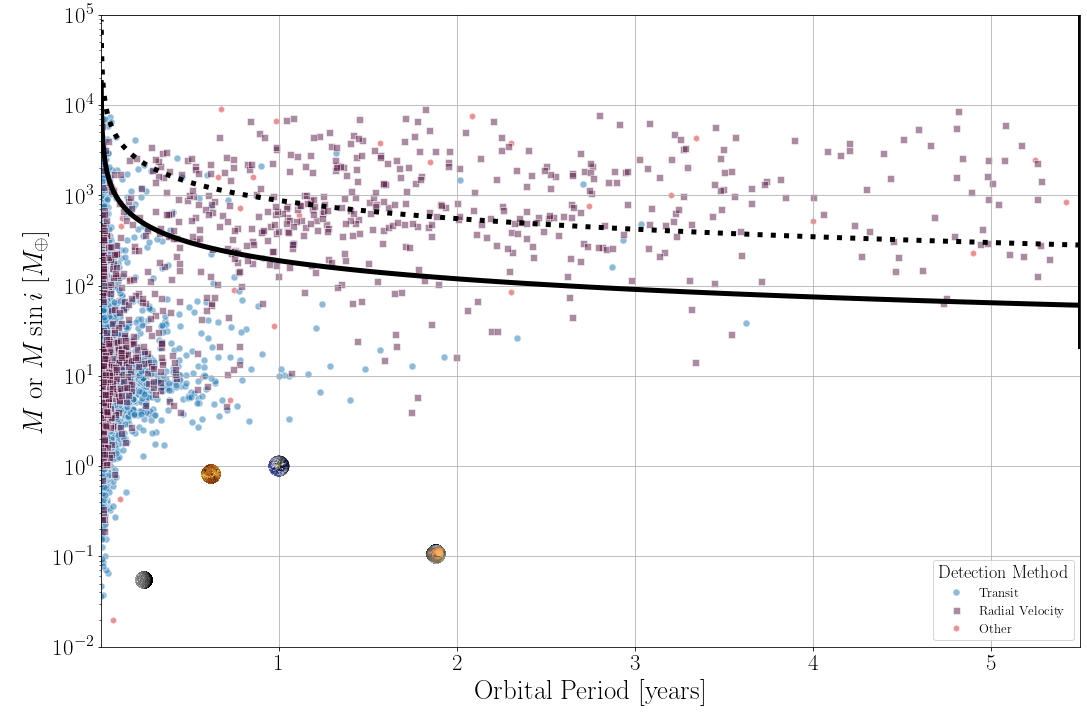

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


from matplotlib.lines import Line2D
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as kde  # Make sure to import kde if not done yet

def plot_contour(data, label, color):
    if len(data) < 2:
        print(f"Not enough data points for {label}. Skipping contour.")
        return
    
    # Use kde to estimate density
    x = np.log10(data['Orbital_Period'] / 365.25)
    y = np.log10(data['Planet_Mass'])
    k = kde.gaussian_kde([x, y])
    
    # Create grid
    xi, yi = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    
    # Plot contour
    plt.contour(10**xi, 10**yi, zi.reshape(xi.shape), colors=color, levels=3, linewidths=5, alpha=0.9)

# Step 2: Filter relevant columns (semi-major axis, Mass, Detection Method)
df = data[['pl_orbper', 'pl_bmasse', 'disc_method']].dropna()

# Rename columns for clarity
df.rename(columns={'pl_orbper': 'Orbital_Period', 'pl_bmasse': 'Planet_Mass', 'disc_method': 'Detection_Method'}, inplace=True)

# Step 3: Combine all non-'tran', non-'rv', non-'ttv' methods into 'Other'
df['Detection_Method'] = df['Detection_Method'].replace({'tran': 'Transit', 'rv': 'Radial Velocity'})
df['Detection_Method'] = df['Detection_Method'].where(df['Detection_Method'].isin(['Transit', 'Radial Velocity']), 'Other')

# Filter the DataFrame to include only relevant detection methods
df = df[df['Detection_Method'].isin(['Transit', 'Radial Velocity', 'Other'])]

# Filter data for 'Transit' and 'Radial Velocity' methods
transit_data = df[df['Detection_Method'] == 'Transit']
rv_data = df[df['Detection_Method'] == 'Radial Velocity']
other_data = df[df['Detection_Method'] == 'Other']

print(len(other_data) + len(rv_data) + len(transit_data))
print(len(df))

# Step 4: Plot mass (or mass*sin(i)) vs. semi-major axis diagram, color by detection method
fig, ax = plt.subplots(figsize=(15, 10))

# Create a scatter plot for Transit
transit_plot = ax.plot(
    transit_data['Orbital_Period'] / 365.25, transit_data['Planet_Mass'],
    color='#1F77B4', ls='', marker='o', ms=7, alpha=0.5, 
    markeredgecolor='white', zorder=-100000, label='Transit'
)

# Create a scatter plot for Radial Velocity
rv_plot = ax.plot(
    rv_data['Orbital_Period'] / 365.25, rv_data['Planet_Mass'],
    color='#581845', ls='', marker='s', ms=7, alpha=0.5, 
    markeredgecolor='white', zorder=-10000, label='Radial Velocity'
)

# Create a scatter plot for Other methods
other_plot = ax.plot(
    other_data['Orbital_Period'] / 365.25, other_data['Planet_Mass'],
    color='#D62728', ls='', marker='h', ms=7, alpha=0.5, 
    markeredgecolor='white', zorder=-1000000, label='Other'
)

# Plot contours for Transit and Radial Velocity
print(f"Number of data points for Transit: {len(transit_data)}")
print(f"Number of data points for Radial Velocity: {len(rv_data)}")
print(f"Number of data points for Other: {len(other_data)}")

# Call the contour plotting function for both Transit and Radial Velocity
#plot_contour(rv_data, 'Radial Velocity Contours', '#581845')
#plot_contour(transit_data, 'Transit Contours', '#1434A4')

# Create legend handles from contour plots
contour_handles = [
    Line2D([0], [0], color='#581845', lw=2, label='Radial Velocity Contours'),
    Line2D([0], [0], color='#1434A4', lw=2, label='Transit Contours')
]

# Combine the original scatter handles with the custom contour handles
# Use only handles, no labels here to avoid mismatch
scatter_handles, scatter_labels = ax.get_legend_handles_labels()
all_legend_handles = scatter_handles
#all_legend_handles = scatter_handles + contour_handles
#all_legend_labels = scatter_labels + [handle.get_label() for handle in contour_handles]




# Define planet masses (in Earth masses) and orbital periods (in years)
planet_masses = np.linspace(10, 10**6, 1000)  # Planet masses from 10 to 1e6 Earth masses
planet_periods = np.linspace(1e-3, gaia_baseline, 10000)  # Planet periods from 1 to 100 years
mass_grid, period_grid = np.meshgrid(planet_masses, planet_periods)


# Define the fixed stellar mass (in solar masses) and distance (in parsecs)
fixed_stellar_mass = [.1, 1]  # 1 Solar Mass
fixed_distance = [150]     # 50 Parsecs

for dist in fixed_distance:
    for stellar_mass in fixed_stellar_mass:
        # Calculate the astrometric signal over the grid
        astrometric_signal_grid = 3 * mass_grid * (stellar_mass ** (-2 / 3)) * (period_grid ** (2 / 3)) * (dist ** (-1))

        if stellar_mass==.1:
            contour = ax.contour(period_grid, mass_grid, astrometric_signal_grid, levels=[detection_threshold], 
                                   linewidths=5, alpha=1, colors='k', zorder=10000, linestyles='solid')
        else:
            contour = ax.contour(period_grid, mass_grid, astrometric_signal_grid, levels=[detection_threshold], 
                                   linewidths=5, alpha=1, colors='k', zorder=10000, linestyles='dotted')

ax.axvline(gaia_baseline, 0.475, 1, color='k', lw=5, ls='solid')
ax.axvline(gaia_baseline, 0.57, 1, color='k', lw=5, ls='dotted')




#Add the Solar System planet images
#Uses the solution by Joe Kington from https://stackoverflow.com/questions/22566284/matplotlib-how-to-plot-images-instead-of-points
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists


#orbital periods from https://www.princeton.edu/~willman/planetary_systems/Sol/
#masses from perry microlensing roman paper code 
planetsize=0.1
imscatter([0.2408467],[0.055], 'mercury.png',ax=ax,zoom=planetsize*0.3)
imscatter([0.61519726],[0.815], 'venus.png',ax=ax,zoom=planetsize*0.9)
imscatter([1.0000174],[1],'Earth_Western_Hemisphere_transparent_background.png',ax=ax,zoom=planetsize)
imscatter([1.8808158],[0.107], 'mars.png',ax=ax,zoom=planetsize*240/500.0*0.9)
imscatter([11.862615],[317.8],'jupiter.png',ax=ax,zoom=planetsize)
imscatter([29.447498],[95.152],'saturn.png',ax=ax,zoom=planetsize*1.35)
imscatter([84.016846],[15.91],'uranus.png',ax=ax,zoom=planetsize)
imscatter([164.79132],[17.147],'neptune.png',ax=ax,zoom=planetsize)






# Axis limits
Mmin = 1e-2
Mmax = 1e5
Pmin = .001
Pmax = 5.5
ax.set_xlim([Pmin, Pmax])
ax.set_ylim([Mmin, Mmax])

plt.grid(which='major')

# Set log scale
#plt.xscale('log')
plt.yscale('log')

# Labels and title
plt.xlabel('Orbital Period [years]', fontsize=27)
plt.ylabel(r'$M$ or $M\sin{i}$ [$M_\oplus$]', fontsize=27)

# Add legend with title
legend = plt.legend(
    all_legend_handles, all_legend_labels, 
    title='Detection Method', loc='lower right', 
    fontsize=13
)
plt.setp(legend.get_title(), fontsize=18)  # Change the legend title font size if needed

plt.tight_layout()

plt.savefig('exoplanet_demographics_wGaia_zoom_150pc.pdf')
plt.show()